In [1]:
%matplotlib inline
%run util_draw.py
from rootpy.io import root_open
# import sys
# from matplotlib import rc
# rc('text', usetex=True)
from ExpData import ExpData
from ExpData import SimData
import ExpData as ed
import math

class InputParms:
    def __init__(self, name):
        self.name = name
        self.dirin = '/home/ephelps/projects/phys-ana-omega/e1f6/test'
        self.e16_sim_fn = None
        self.e16_h6r_fn = None
        self.e16_h6r_dir = 'h6recon'
        self.e16_exp_fn = None
        self.e16_h6e_dir = 'h6_eid_efid_nphe_hfid_pcor_badsc_mmp'
        self.e1f_sim_fn = None
        self.e1f_h6r_fn = None
        self.e1f_h6r_dir = 'h6recon'
        self.e1f_exp_fn = None
        self.e1f_h6e_dir = 'h6_eid_efid_nphe_hfid_pcor_badsc_mmp'

parms_t0 = InputParms('tight0')
parms_t0.e16_sim_fn = 'e16_sim_skim_top1_175_275_t03.root'
parms_t0.e16_h6r_fn = parms_t0.e16_sim_fn
parms_t0.e16_exp_fn = 'e16_exp_h6_t0_nopcor.root' #'e16_exp_h6_top1.root'
parms_t0.e1f_sim_fn = 'e1f_sim_skim_top1_175_275_t03.root'
parms_t0.e1f_h6r_fn = parms_t0.e1f_sim_fn
parms_t0.e1f_exp_fn = 'e1f_exp_h6_top1.root'

parms_t1 = InputParms('tight1')
parms_t1.e16_sim_fn = 'e16_sim_skim_top1_175_275_t03.root'
parms_t1.e16_h6r_fn = 'e16_sim_skim_top1_175_275_t1.root'
parms_t1.e16_h6r_dir = 'tight3_h6recon'
parms_t1.e16_exp_fn = 'e16_exp_h6_t1_nopcor.root'
parms_t1.e1f_sim_fn = 'e1f_sim_skim_top1_175_275_t03.root'
parms_t1.e1f_h6r_fn = 'e1f_sim_skim_top1_175_275_t1.root'
parms_t1.e1f_h6r_dir = 'tight3_h6recon'
parms_t1.e1f_exp_fn = 'e1f_exp_h6_t1.root'

parms_t2 = InputParms('tight2')
parms_t2.e16_sim_fn = 'e16_sim_skim_top1_175_275_t03.root'
parms_t2.e16_h6r_fn = 'e16_sim_skim_top1_175_275_t2.root'
parms_t2.e16_h6r_dir = 'tight3_h6recon'
parms_t2.e16_exp_fn = 'e16_exp_h6_t2_nopcor.root'
parms_t2.e1f_sim_fn = 'e1f_sim_skim_top1_175_275_t03.root'
parms_t2.e1f_h6r_fn = 'e1f_sim_skim_top1_175_275_t2.root'
parms_t2.e1f_h6r_dir = 'tight3_h6recon'
parms_t2.e1f_exp_fn = 'e1f_exp_h6_t2.root'

parms_t3 = InputParms('tight3')
parms_t3.e16_sim_fn = 'e16_sim_skim_top1_175_275_t03.root'
parms_t3.e16_h6r_fn = parms_t0.e16_sim_fn
parms_t3.e16_h6r_dir = 'tight3_h6recon'
parms_t3.e16_exp_fn = 'e16_exp_h6_t3_nopcor.root'
parms_t3.e1f_sim_fn = 'e1f_sim_skim_top1_175_275_t03.root'
parms_t3.e1f_h6r_fn = parms_t0.e1f_sim_fn
parms_t3.e1f_h6r_dir = 'tight3_h6recon'
parms_t3.e1f_exp_fn = 'e1f_exp_h6_t3.root'

In [2]:
E1F_E0 = 5.497
E16_E0 = 5.754
E1F_LUM = 19.844e6
E16_LUM = 28.1e6

PI = 3.14159265358979312
FSC = 0.00729735253
A = FSC
NA = 6.02214129E23
QE = 1.60217646E-19
MP = 0.93827203
MOMEGA = 0.78265
WOMEGA = 0.00849
BR = 0.891

def mdraw2d(hists, rows=2, cols=3, xlabel='', ylabel='',
            xlims=None, ylims=None, vmin=None, vmax=None,
            space=0, grid=False, figsize=None, **kwargs):
    nr, nc = rows, cols
    if figsize is None:
        figsize=goldenaspect(6.5,nr,nc)
    fig = plt.figure(figsize=figsize)
    gs = gridspec.GridSpec(nr, nc, wspace=space, hspace=2*space, left=0.1, right=0.95, bottom=0.175)
    im = None
    gmin = min([h.GetMaximum() for h in hists]) if vmin is None else vmin
    gmax = max([h.GetMaximum() for h in hists]) if vmax is None else vmax
    mult = 1.0 if gmin<=0.9*gmax else 0.9
    vmax = mult*gmax if vmax is None else vmax
    for irow in range(0,nr):
        for icol in range(0,nc):
            hnum = nc*irow+(icol+1)
            h = hists[hnum-1]
            ax = plt.subplot(gs[irow, icol])
            im = rplt.imshow(asrootpy(h), axes=ax, vmin=vmin, vmax=vmax, **kwargs)
#             rplt.hist2d(h, axes=ax, **kwargs) #, norm=LogNorm())
            if xlims is not None:
                plt.xlim(xlims)
            if ylims is not None:
                plt.ylim(ylims)
            if icol > 0:
                ax.set_yticklabels('')
            if irow+1 < nr:
                ax.set_xticklabels('')
            if grid is True:
                plt.grid()
    fig.add_axes([0.06, 0.105, 0.94, 0.895], frameon=False)
    plt.xticks([])
    plt.yticks([])
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
#     fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.975, 0.2, 0.02, 0.7])
    fig.colorbar(im, cax=cbar_ax)
    return fig

def nu(w, q2):
    return (w*w-MP*MP+q2)/(2*MP)


def epsilon(w, q2, e0=E1F_E0):
    n = nu(w, q2)
    e1 = e0-n
    epsInv = 1+2*(q2+n*n)/(4*e0*e1-q2)
    return 1.0/epsInv


def vgflux(w, q2, e0=E1F_E0):
    eps = epsilon(w, q2)
    return A*w*(w*w-MP*MP)/(4*PI*e0*e0*MP*MP*q2*(1-eps))


def xbjork(w, q2):
    return q2/(2*MP*nu(w, q2))

def interp_nn(h, ibin0):
    iL,iR = 0,0
    vL,vR = 0,0
    eL,eR = 0,0
    for ibin in range(ibin0+1,h.GetNbinsX()+1):
        v,e = h.GetBinContent(ibin),h.GetBinError(ibin)
        if v!=0:
            iR = ibin
            vR = v
            eR = e
            break
    for ibin in reversed(range(1,ibin0)):
        v,e = h.GetBinContent(ibin),h.GetBinError(ibin)
        if v!=0:
            iL = ibin
            vL = v
            eL = e
            break
    vL = vR if iL==0 else vL
    vR = vL if iR==0 else vR
    e = (eL**2+eR**2)**0.5
    if vL == vR:
        return (vL, e)
    else:
        #y = y1+m(x-x1)
        m = (vR-vL)/(iR-iL)
        return (vL+m*(ibin0-iL), e)

def w8d_Q2_mean(Q2_0, Q2_1):
    n = math.log(Q2_1)-math.log(Q2_0)
    d = 1/Q2_0-1/Q2_1
    return n/d

In [3]:
def calc_diff_xsects(W, Q2, exparms, suppress_chatter=False, h2rad=None):
    struct_funcs = []
    binned, sim, e0, lum, sim_err_0, sim_lo_acc = exparms
    h2_exp_set = binned.get_h2s(W, Q2)
    h2_sim_set = sim.get_acc2d(W, Q2, sim_err_0, sim_lo_acc)
    if h2rad is not None:
        _, _, _W, _ = ed.get_adjusted_edges(h2rad.GetXaxis(), W)
        _, _, _Q2, _ = ed.get_adjusted_edges(h2rad.GetYaxis(), Q2)
        bW, bQ2 = h2rad.GetXaxis().FindBin(_W), h2rad.GetYaxis().FindBin(_Q2)
        w8 = h2rad.GetBinContent(bW, bQ2)
        h2_exp_set[0].Scale(w8)
    
    h2e_b4acc = h2_exp_set[0]

    h2a = h2_sim_set[0][4]

    h2e = h2_exp_set[0].Clone('%s_diffs'%h2_exp_set[0].GetName())
    h2e.Divide(h2a)

    result = h2_exp_set[1]

    hacc,herr = ed.get_vhists(h2_sim_set[0][2])
    hacc_m, herr_m = ed.get_vhists(h2_sim_set[0][4])
    hacc.SetBinContent(1,0)
    herr.SetBinContent(1,0)
    hacc_m.SetBinContent(1,0)
    herr_m.SetBinContent(1,0)

    if not suppress_chatter:
        fig = mdraw([hacc,herr], 2,1)
#         for h,ax in zip([hacc_m, herr_m], fig.get_axes()):
#             X, Y = list(h.x()), list(h.y())
#             ax.plot(X, Y, 'go')
        for ax in fig.get_axes():
            ax.set_xlim(0, 0.4)
            ax.set_ylim(0)
            ax.grid()
        fig2 = mdraw([hacc_m, herr_m], 2,1)
        for ax in fig2.get_axes():
            ax.set_xlim(0, 0.4)
            ax.set_ylim(0)
            ax.grid()
        # draw(hacc)
        # plt.ylim(0)
        # plt.xlim(0,0.2)
        # draw(herr)
        # plt.ylim(0)
        # plt.xlim(0,0.2)

    if not suppress_chatter:
        draw(result[2])
        fitted_points = get_points_from_TF1(result[4], 0.6, 0.95)
        X, Y = zip(*fitted_points)
        Y_bg = [ed.bgfun([x], result[3]) for x in X]
        plt.plot(X, Y)
        plt.plot(X, Y_bg)
        plt.vlines(0.825,0,3500)
        plt.grid()
        plt.show()

    hs = [h2e_b4acc,h2a,h2e]

    if not suppress_chatter:
        fig = mdraw(hs,3,1)
        for h,ax in zip(hs,fig.axes):
            im = rplt.imshow(asrootpy(h), axes=ax)
            plt.colorbar(im, ax=ax) #clim=(h.GetMinimum(),h.GetMaximum()), ax=ax)
            plt.tight_layout()

    W, _, _, _ = ed.get_adjusted_edges(binned.h6y.GetAxis(0), W)
    Q2, _, _, _ = ed.get_adjusted_edges(binned.h6y.GetAxis(1), Q2)
    avgQ2 = w8d_Q2_mean(Q2[0],Q2[1])
    avgW = sum(W)/2 if isinstance(W, list) else W
    dW = 0.02 if not isinstance(W, list) else W[1]-W[0]
    dQ2 = 0.05 if not isinstance(Q2, list) else Q2[1]-Q2[0]
    dPHI, dCOST = 2*PI/18, 0.2
    xb = xbjork(avgW, avgQ2)
    eps = epsilon(avgW, avgQ2, e0)
    flux = vgflux(avgW, avgQ2, e0)
    normval = BR*lum*flux*dW*dQ2*dCOST*dPHI
    if not suppress_chatter:
        print('h2e_b4acc int: %.1f (normed: %.1f)'%(h2e_b4acc.Integral('width'), h2e_b4acc.Integral('width')/normval))
        print('h2e_afacc int: %.1f (normed: %.1f)'%(h2e.Integral('width'), h2e.Integral('width')/normval))
        print('-----')
        
    def dcoss(x, p):
        A_TOT = 1
        A_TT = eps*math.cos(2*x[0])
        A_LT = math.sqrt(2*eps*(1+eps))*math.cos(x[0])
        return A_TOT*p[0]+A_TT*p[1]+A_LT*p[2]

    fcoss = R.TF1('fcoss', dcoss, -PI, PI, 3)
    fpol0 = R.TF1('fpol0', lambda x,p: p[0], -PI, PI, 1)
    fcoss.SetParLimits(0,0,3000)
    hphis, holes, pcoss = [], [], []
    for ibin in range(1,h2e.GetNbinsY()+1):
        hphi = asrootpy(h2e.ProjectionX('%s_%d'%(h2e.GetName(),ibin),ibin,ibin))
        hphi.Scale(1/normval)
        these_holes = hphi.Clone('%s_holes'%h2e.GetName())
        these_holes.Reset()
        for ix in range(1,hphi.GetNbinsX()+1):
            if hphi.GetBinError(ix) == 0:
                nnval, nnerr = interp_nn(hphi, ix)
                these_holes.SetBinContent(ix, nnval)
                these_holes.SetBinError(ix, nnerr)
#                 hphi.SetBinContent(ix, nnval)
#                 hphi.SetBinError(ix, nnerr)
        hphi.Fit(fcoss, 'N0', 'goff')
        fcoss_parms = [(fcoss.GetParameter(i),fcoss.GetParError(i)) for i in range(0,3)]
        if not suppress_chatter:
            print('\n'.join([str(parm) for parm in fcoss_parms]))
            print('-')
        cost = h2e.GetYaxis().GetBinCenter(ibin)
        pcoss.append([avgW, avgQ2, cost, fcoss_parms])
        holes.append(these_holes)
        hphis.append(hphi)
        
    if not suppress_chatter:
        fig = mdraw(hphis, 2,5)
        for i,ax in enumerate(fig.axes):
            Xlin = np.linspace(-PI, PI)
            for iparm, (parm,err) in enumerate(pcoss[i][3]):
                fcoss.SetParameter(iparm, parm)
            Ycoss = [fcoss.Eval(x) for x in Xlin]
            ax.plot(Xlin, Ycoss, 'g')
            XY = [(x, y) for (x, y) in zip(list(holes[i].x()), list(holes[i].y())) if y!=0]
            Yerr = [yerr[0] for (x, yerr) in zip(list(holes[i].x()), list(holes[i].yerr())) if yerr[0]!=0]
            if len(XY)>0:
                X, Y = zip(*XY)
                ax.errorbar(X, Y, Yerr, fmt='ro', zorder=20)
            ax.grid()
    #         ax.vlines(X, -1000, 3000, 'r', linestyles='dashed')
    plt.show()

    int_2d = 0
    int_2d_b = 0
    for hphi,these_holes in zip(hphis, holes):
        int_2d += hphi.Integral('width')*dCOST
        int_2d_b += hphi.Integral('width')*dCOST
        int_2d_b += these_holes.Integral('width')*dCOST
    
    int_2d_0 = 0
    int_2d_1 = 0
    for pcos in pcoss:
        for iparm, (parm,err) in enumerate(pcos[3]):
            fcoss.SetParameter(iparm, parm)
        int_2d_0 += sum([fcoss.Eval(x) for x in hphi.x()])*dCOST*dPHI
        int_2d_1 += pcos[3][0][0]*dCOST*2*math.pi
    
    if not suppress_chatter:
        print('bjorken=%.3f'%xb)
        print('Q2=%.3f'%avgQ2)
        print('W=%.3f'%avgW)
        print('epsilon=%.3f'%eps)
        print('xsect_f=%.1f (alt: %.1f)'%(int_2d_0, int_2d_1))
        print('xsect_d=%.1f (alt: %.1f)'%(int_2d, int_2d_b))
    return (xb, avgQ2, avgW, eps, int_2d_0, int_2d, (W, Q2), pcoss)

In [4]:
def xsects(W0, W1, Q2ranges, parms=parms_t0):
    e1f_binned = ExpData('%s/%s'%(parms.dirin, parms.e1f_exp_fn),
                         h6dir=parms.e1f_h6e_dir)
    e16_binned = ExpData('%s/%s'%(parms.dirin, parms.e16_exp_fn),
                         h6dir=parms.e16_h6e_dir)
    
    e16_sim = SimData()
    e16_sim.add_sim('%s/%s'%(parms.dirin,parms.e16_sim_fn),
                    h6rdir=parms.e16_h6r_dir,
                    h6rfn='%s/%s'%(parms.dirin,parms.e16_h6r_fn))

    e1f_sim = SimData()
    e1f_sim.add_sim('%s/%s'%(parms.dirin,parms.e1f_sim_fn),
                    h6rdir=parms.e1f_h6r_dir,
                    h6rfn='%s/%s'%(parms.dirin,parms.e1f_h6r_fn))
        
    e1f_exparms = (e1f_binned, e1f_sim, E1F_E0, E1F_LUM, 0.15, 0.015)
    e16_exparms = (e16_binned, e16_sim, E16_E0, E16_LUM, 0.25, 0.015)

    Ws = np.arange(W0, W1, 0.02)

    e1f_xsects, e16_xsects = [], []
    for Q2 in Q2ranges:
        e1f_xsects.append([calc_diff_xsects(w, Q2, e1f_exparms, True) for w in Ws])
        e16_xsects.append([calc_diff_xsects(w, Q2, e16_exparms, True) for w in Ws])

    for e1f_xsect, e16_xsect in zip(e1f_xsects, e16_xsects):
        e1f_avgQ2 = e1f_xsect[0][1]
        e16_avgQ2 = e16_xsect[0][1]
        
        XY = [(xsect[2], xsect[5]) for xsect in e1f_xsect]
        X,Y = zip(*XY)
        ymax0 = max(Y)
        plt.plot(X, Y, 'o', label='e1f, %.3f'%e1f_avgQ2)
        
        XY = [(xsect[2], xsect[5]) for xsect in e16_xsect]
        X,Y = zip(*XY)
        ymax1 = max(Y)
        plt.plot(X, Y, 'o', label='e16, %.3f'%e16_avgQ2)
        
        plt.ylim(0, 1.1*max([ymax0,ymax1]))
        plt.grid()
        plt.legend()
        plt.show()
        
        # e1?_xsects contains a list for each Q2 range;
        # each Q2 range list contains
        #    xb, avgQ2, avgW, eps, int_2d_0, int_2d, (W, Q2), pcoss
        # where W and Q2 are ranges and pcoss is a list of
        #    avgW, avgQ2, cost, fcoss_parms
        # and fcoss_parms is a list of tuples where each tuple
        # is (parm_value, parm_error).
    return (e16_xsects, e1f_xsects)

In [5]:
def xsects(W0, W1, Q2ranges, parms=parms_t0):
    e1f_binned = ExpData('%s/%s'%(parms.dirin, parms.e1f_exp_fn),
                         h6dir=parms.e1f_h6e_dir)
    e16_binned = ExpData('%s/%s'%(parms.dirin, parms.e16_exp_fn),
                         h6dir=parms.e16_h6e_dir)
    
    e16_sim = SimData()
    e16_sim.add_sim('%s/%s'%(parms.dirin,parms.e16_sim_fn),
                    h6rdir=parms.e16_h6r_dir,
                    h6rfn='%s/%s'%(parms.dirin,parms.e16_h6r_fn))

    e1f_sim = SimData()
    e1f_sim.add_sim('%s/%s'%(parms.dirin,parms.e1f_sim_fn),
                    h6rdir=parms.e1f_h6r_dir,
                    h6rfn='%s/%s'%(parms.dirin,parms.e1f_h6r_fn))
        
    e1f_exparms = (e1f_binned, e1f_sim, E1F_E0, E1F_LUM, 0.15, 0.015)
    e16_exparms = (e16_binned, e16_sim, E16_E0, E16_LUM, 0.25, 0.015)

    Ws = np.arange(W0, W1, 0.02)

    e1f_xsects, e16_xsects = [], []
    for Q2 in Q2ranges:
        e1f_xsects.extend([calc_diff_xsects(w, Q2, e1f_exparms, True, parms.h2rad) for w in Ws])
        e16_xsects.extend([calc_diff_xsects(w, Q2, e16_exparms, True, parms.h2rad) for w in Ws])
        
        # e1?_xsects contains a list of
        #    xb, avgQ2, avgW, eps, int_2d_0, int_2d, (W, Q2), pcoss
        # where W and Q2 are ranges and pcoss is a list of
        #    avgW, avgQ2, cost, fcoss_parms
        # and fcoss_parms is a list of tuples where each tuple
        # is (parm_value, parm_error).
    return (e16_xsects, e1f_xsects)

In [6]:
def get_exp_parms(q2str, name=None, wmax=2.6, q2ranges=None, fn_h2rad='../e1f6/test/hQ2W_rad_corr.root'): #fn_h2rad=None):
    if name is None:
        name = q2str
    parms = InputParms(name)
    parms.e16_sim_fn = 'e16_sim_skim_top1_%s_ho.root'%q2str
    parms.e16_h6r_fn = parms.e16_sim_fn
    parms.e16_exp_fn = 'e16_skim_small_h6_t0.root' #'e16_exp_h6_t0_nopcor.root' #'e16_exp_h6_top1.root'
    parms.e1f_sim_fn = 'e1f_sim_skim_top1_%s_ho.root'%q2str
    parms.e1f_h6r_fn = parms.e1f_sim_fn
    parms.e1f_exp_fn = 'e1f_skim_small_h6_t0.root' #'e1f_exp_h6_t0.root'
    parms.h2rad = None
    if fn_h2rad is not None:
        with root_open(fn_h2rad) as fin:
            h2rad = fin['hQ2W_corr']
            h2rad.SetDirectory(0)
            parms.h2rad = asrootpy(h2rad)
    if q2ranges is None:
        (q2_0, q2_1) = [float(q2) for q2 in q2str.split('-')]
        parms.q2ranges = [[q2_0+0.16, q2_0+0.45],
                          [q2_0+0.46, q2_1-0.25]]
    else:
        parms.q2ranges = q2ranges
    parms.wmax = wmax
    parms.acc_lo = 0.015
    parms.err_hi = 0.15
    return parms

parms_exp_q2strs = ['1.75-2.75', '2.25-3.25', '2.75-3.75',
                    '3.25-4.25', '3.75-4.75', '4.25-5.25']
parms_exp_wmaxs = [2.6, 2.55, 2.3, 2.2, 2.1, 2]
# parms_exp_wmaxs = [2.6]*6
parms_exps = [get_exp_parms(q2str) for q2str in parms_exp_q2strs]
for (wmax, parms) in zip(parms_exp_wmaxs, parms_exps):
    parms.wmax = wmax
parms_exps[3].q2ranges=[[3.35,4.15]]
parms_exps[4].q2ranges=[[3.85,4.65]]
parms_exps[5].q2ranges=[[4.35,5.15]]

In [7]:
# (e16_xsects_t0, e1f_xsects_t0) = xsects(1.71, 2.3, [[2.85, 3.15], [3.15, 3.65]], parms_exps[2])

In [8]:
parms = parms_exps[0]
e1f_sim = SimData()
e1f_sim.add_sim('%s/%s'%(parms.dirin,parms.e1f_sim_fn),
                h6rdir=parms.e1f_h6r_dir,
                h6rfn='%s/%s'%(parms.dirin,parms.e1f_h6r_fn))
e1f_binned = ExpData('%s/%s'%(parms.dirin, parms.e1f_exp_fn),
                     h6dir=parms.e1f_h6e_dir)

Setting up binned data for /home/ephelps/projects/phys-ana-omega/e1f6/test/e1f_skim_small_h6_t0.root:h6_eid_efid_nphe_hfid_pcor_badsc_mmp


In [9]:
e16_sim = SimData()
e16_sim.add_sim('%s/%s'%(parms.dirin,parms.e16_sim_fn),
                h6rdir=parms.e16_h6r_dir,
                h6rfn='%s/%s'%(parms.dirin,parms.e16_h6r_fn))
e16_binned = ExpData('%s/%s'%(parms.dirin, parms.e16_exp_fn),
                     h6dir=parms.e16_h6e_dir)

Setting up binned data for /home/ephelps/projects/phys-ana-omega/e1f6/test/e16_skim_small_h6_t0.root:h6_eid_efid_nphe_hfid_pcor_badsc_mmp


INFO:ROOT.TCanvas.MakeDefCanvas]  created default TCanvas with name c1


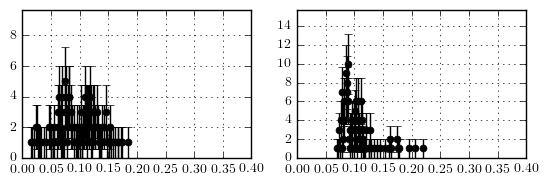

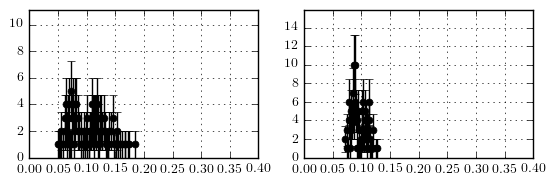

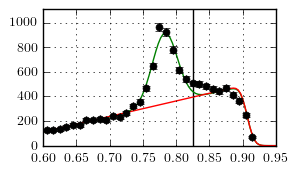

h2e_b4acc int: 216.4 (normed: 126.8)
h2e_afacc int: 2055.1 (normed: 1204.2)
-----
(122.0482595401996, 9.0290505008131)
(-3.7379947417624804, 15.920415561793531)
(-9.984953036389344, 7.648514301008298)
-
(117.78213976235902, 9.451489188317865)
(35.660514361632224, 17.33954743823304)
(-25.848246705541328, 7.834451041170444)
-
(97.9666378748652, 9.998079690929558)
(27.235947517935728, 17.640094100617493)
(-8.816725560661773, 7.779342240544785)
-
(61.13323120368624, 10.952365401274228)
(34.944036946733775, 18.11568156254531)
(-20.019955806863546, 8.413951748252485)
-
(53.5858218195599, 11.66076631592017)
(34.817047382964695, 18.456927221106003)
(0.7824962412912836, 9.62735546834439)
-
(89.4196010561863, 15.623481487335255)
(14.531990290448071, 23.639555732088915)
(18.47907227560029, 13.424455951081809)
-
(95.54625891092778, 14.371047490075476)
(55.27821334087643, 22.828804054987668)
(25.717803515490747, 13.214512816226865)
-
(118.54696510596918, 14.941105156759306)
(40.52070004564045, 24.6

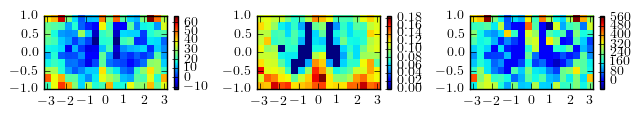

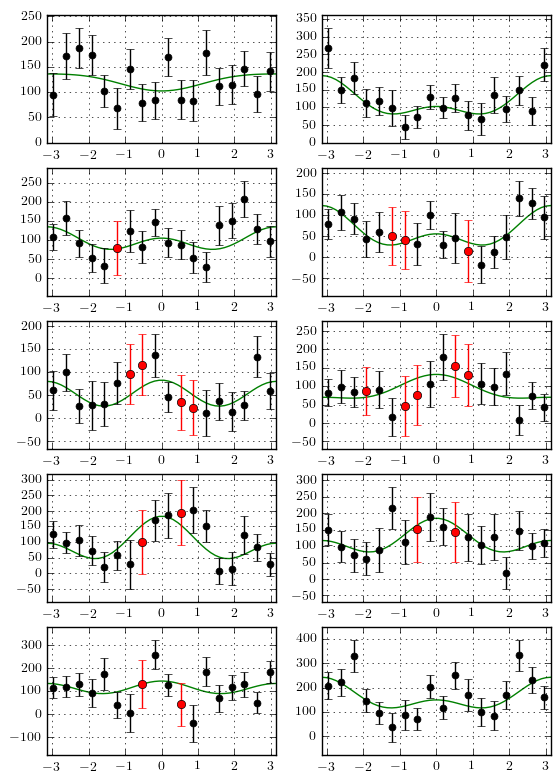

bjorken=0.457
Q2=2.143
W=1.850
epsilon=0.792
xsect_f=1295.0 (alt: 1295.0)
xsect_d=1204.2 (alt: 1323.5)


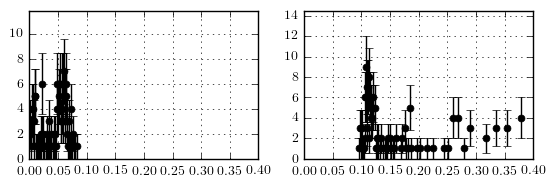

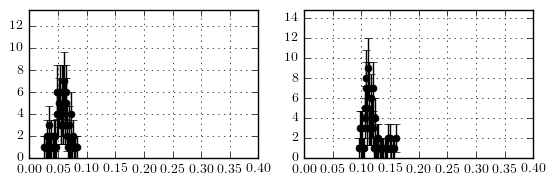

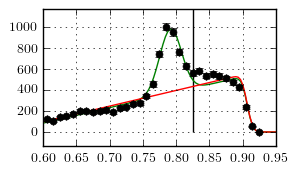

h2e_b4acc int: 197.0 (normed: 89.3)
h2e_afacc int: 4066.6 (normed: 1843.8)
-----
(266.6299722239613, 19.120819990804605)
(3.4822639537039475, 31.950305710836414)
(-9.718444764531556, 16.177876393870292)
-
(252.51620249424045, 20.299869076400725)
(5.0422580800112495, 36.017812216928725)
(-1.0500070662414247, 16.44594056955081)
-
(151.23745940504952, 22.003084415329468)
(23.243059699506396, 36.74473249493176)
(-46.92706881292227, 14.837975505401792)
-
(128.05295922535564, 30.96061528492966)
(9.585172014292986, 47.28172277766453)
(-24.510154406570027, 18.429700896370008)
-
(95.69694375579674, 30.55895289861393)
(22.633259976066118, 46.745879012744744)
(-6.291047465663273, 19.170209959204282)
-
(48.88223456268287, 37.174235708793)
(30.744503337457207, 53.70412759110367)
(-2.989195272745835, 22.072852099789824)
-
(116.497787034263, 53.94551226039163)
(82.30735599267123, 76.64284234277139)
(13.045229129408309, 27.830853386271325)
-
(268.73536739033426, 59.15796455487819)
(-115.71587796394661

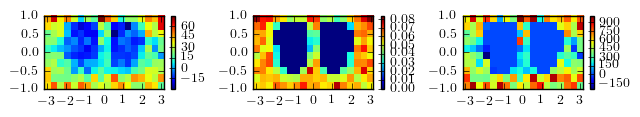

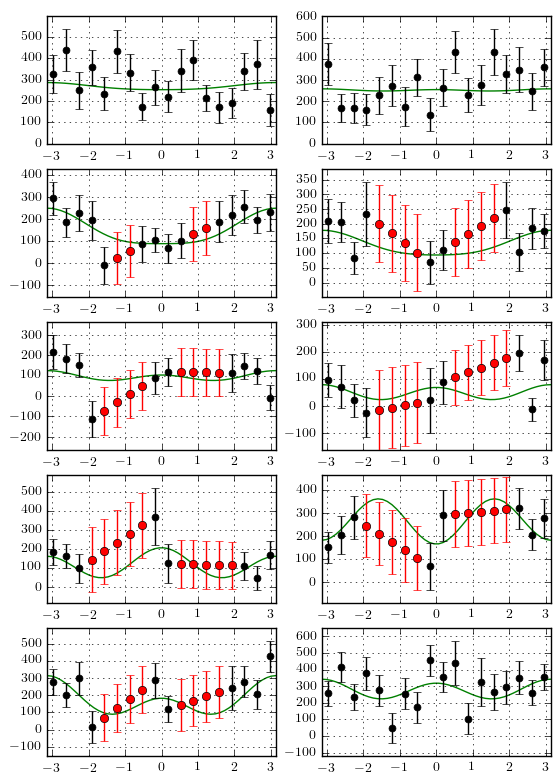

bjorken=0.457
Q2=2.143
W=1.850
epsilon=0.813
xsect_f=2233.7 (alt: 2233.7)
xsect_d=1843.8 (alt: 2424.3)


(0.457404979387789,
 2.1430164497524333,
 1.85,
 0.8129827201544688,
 2233.71603112604,
 1843.7963486781568,
 ([1.84, 1.86], [2.0, 2.3]),
 [[1.85,
   2.1430164497524333,
   -0.9,
   [(266.6299722239613, 19.120819990804605),
    (3.4822639537039475, 31.950305710836414),
    (-9.718444764531556, 16.177876393870292)]],
  [1.85,
   2.1430164497524333,
   -0.7000000000000001,
   [(252.51620249424045, 20.299869076400725),
    (5.0422580800112495, 36.017812216928725),
    (-1.0500070662414247, 16.44594056955081)]],
  [1.85,
   2.1430164497524333,
   -0.5,
   [(151.23745940504952, 22.003084415329468),
    (23.243059699506396, 36.74473249493176),
    (-46.92706881292227, 14.837975505401792)]],
  [1.85,
   2.1430164497524333,
   -0.29999999999999993,
   [(128.05295922535564, 30.96061528492966),
    (9.585172014292986, 47.28172277766453),
    (-24.510154406570027, 18.429700896370008)]],
  [1.85,
   2.1430164497524333,
   -0.09999999999999995,
   [(95.69694375579674, 30.55895289861393),
    (22.63

In [10]:
e1f_exparms = (e1f_binned, e1f_sim, E1F_E0, E1F_LUM, 0.15, 0.05)
# calc_diff_xsects(2.4, [1.91, 2.20], e1f_exparms, False, parms.h2rad)
calc_diff_xsects(1.85, [2, 2.30], e1f_exparms, False, parms.h2rad)

# parms = parms_exps[5]
# e16_sim = SimData()
# e16_sim.add_sim('%s/%s'%(parms.dirin,parms.e16_sim_fn),
#                 h6rdir=parms.e16_h6r_dir,
#                 h6rfn='%s/%s'%(parms.dirin,parms.e16_h6r_fn))
# e16_binned = ExpData('%s/%s'%(parms.dirin, parms.e16_exp_fn),
#                      h6dir=parms.e16_h6e_dir)

e16_exparms = (e16_binned, e16_sim, E16_E0, E16_LUM, 0.15, 0.025)
calc_diff_xsects(1.85, [2, 2.30], e16_exparms, False, parms.h2rad)

In [11]:
from scipy import optimize as so
import pandas as pd
%matplotlib inline

def legR2(x, c0, c1, c2):
    return np.polynomial.legendre.Legendre([c0,c1,c2])(x)

def get_xsect_dict(xsects):
    #xb, avgQ2, avgW, eps, int_2d_0, int_2d, (W, Q2), pcoss
    dicts = []
    for (xb, eps, xtot_f, xtot_d, wq2_data) in [(xsects_1wq2bin[0], xsects_1wq2bin[3], xsects_1wq2bin[4], xsects_1wq2bin[5], xsects_1wq2bin[7]) for xsects_1wq2bin in xsects]:
        for cost_data in wq2_data:
            W, Q2, cost, parms = cost_data
            W, Q2, cost = [round(x,3) for x in (W,Q2,cost)]
            (x_tot, x_tot_err), (x_tl, x_tl_err), (x_tt, x_tt_err) = parms
            _nu = nu(W, Q2)
            eps_l = Q2/_nu**2*eps
            names = ['nu', 'xb', 'eps', 'eps_l', 'W', 'Q2', 'cost', 'int_f', 'int_d', 'x_tot', 'x_tot_err',
                     'x_tl', 'x_tl_err', 'x_tt', 'x_tt_err']
            vals = [_nu, xb, eps, eps_l, W, Q2, cost, xtot_f, xtot_d, x_tot, x_tot_err,
                     x_tt, x_tt_err, x_tl, x_tl_err]
            dicts.append({n:v for (n,v) in zip(names,vals)})
    return dicts

def get_legs_dict(df, W, Q2, fitfunc=legR2):
    df_wq2 = df[(df.W==W)&(df.Q2==Q2)]
    parm_vals, parm_errs = (0,0,0), (0,0,0)
    vals, names = [], []
    if len(df_wq2.replace(0,np.NaN).dropna()) >= 3:
        parm_vals, pcov = so.curve_fit(fitfunc, df_wq2.cost,
                                       df_wq2.x_tot,
                                       sigma=df_wq2.x_tot_err.replace(0,np.NaN),
                                       absolute_sigma=True)
        parm_errs = np.sqrt(np.diag(pcov))
        vals = [df_wq2.nu.iloc[0], df_wq2.xb.iloc[0], df_wq2.eps.iloc[0], df_wq2.eps_l.iloc[0], W, Q2]
        for v, e in zip(parm_vals, parm_errs):
            vals.extend([v,e])
        names = ['nu', 'xb', 'eps', 'eps_l', 'W', 'Q2', 'D0_tot', 'D0_tot_err',
                 'D1_tot', 'D1_tot_err', 'D2_tot', 'D2_tot_err']
    return ({n:v for (n,v) in zip(names,vals)})

def plots_1wq2bin(df, W, Q2, ax=None, fitfunc=legR2):
    df_wq2 = df[(df.W==W)&(df.Q2==Q2)]
    fig, ax = plt.subplots() if ax is None else _, ax
    df_wq2.plot('cost', 'x_tot', kind='scatter', yerr='x_tot_err', ax=ax, grid=True)
    parm_vals, pcov = so.curve_fit(fitfunc, df_wq2.cost,
                                   df_wq2.x_tot,
                                   sigma=df_wq2.x_tot_err.replace(0,np.NaN),
                                   absolute_sigma=True)
    parm_errs = np.sqrt(np.diag(pcov))
#     w8s = df_wq2.x_tot_err.apply(lambda x: 1/(x**2) if x>0 else 0)
#     leg_parms = np.polynomial.legendre.legfit(df_wq2.cost.values,
#                                               df_wq2.x_tot.values,
#                                               w=w8s.values,
#                                               deg=2, full=True)
#     fleg = np.polynomial.legendre.Legendre(leg_parms[0])
    Xlin = np.linspace(-1,1)
#     Y = [fleg(x) for x in Xlin]
    Y = [legR2(x, *parm_vals) for x in Xlin]
    ax.plot(Xlin,Y)
#     return (leg_parms)
    
    return (parm_vals, parm_errs)

In [12]:
parms = parms_exps[0]
(e16_xsects_t0, e1f_xsects_t0) = xsects(1.71, parms.wmax, parms.q2ranges, parms)
(e16_dicts, e1f_dicts) = (get_xsect_dict(e16_xsects_t0), get_xsect_dict(e1f_xsects_t0))

Setting up binned data for /home/ephelps/projects/phys-ana-omega/e1f6/test/e1f_skim_small_h6_t0.root:h6_eid_efid_nphe_hfid_pcor_badsc_mmp
Setting up binned data for /home/ephelps/projects/phys-ana-omega/e1f6/test/e16_skim_small_h6_t0.root:h6_eid_efid_nphe_hfid_pcor_badsc_mmp


**************
Cleaning up...
--------------
simulated data files:
	/home/ephelps/projects/phys-ana-omega/e1f6/test/e16_sim_skim_top1_1.75-2.75_ho.root
**************
**************
Cleaning up...
--------------
data file:	/home/ephelps/projects/phys-ana-omega/e1f6/test/e16_skim_small_h6_t0.root
directory:	h6_eid_efid_nphe_hfid_pcor_badsc_mmph6 yields:	hbd_yield
h6 weights:	hbd_nphe_eff
**************
**************
Cleaning up...
--------------
simulated data files:
	/home/ephelps/projects/phys-ana-omega/e1f6/test/e1f_sim_skim_top1_1.75-2.75_ho.root
**************
**************
Cleaning up...
--------------
data file:	/home/ephelps/projects/phys-ana-omega/e1f6/test/e1f_skim_small_h6_t0.root
directory:	h6_eid_efid_nphe_hfid_pcor_badsc_mmph6 yields:	hbd_yield
h6 weights:	hbd_nphe_eff
**************


In [13]:
# (e16_xsects_t0, e1f_xsects_t0) = xsects(1.71, 1.9, [[3.85, 4.65]], parms_exps[4])

# e16_dicts.extend(get_xsect_dict(e16_xsects_t0))
# e1f_dicts.extend(get_xsect_dict(e1f_xsects_t0))

In [14]:
for parms in parms_exps[1:]:
    (e16_xsects_t0, e1f_xsects_t0) = xsects(1.71, parms.wmax, parms.q2ranges, parms)
    e16_dicts.extend(get_xsect_dict(e16_xsects_t0))
    e1f_dicts.extend(get_xsect_dict(e1f_xsects_t0))

Setting up binned data for /home/ephelps/projects/phys-ana-omega/e1f6/test/e1f_skim_small_h6_t0.root:h6_eid_efid_nphe_hfid_pcor_badsc_mmp
Setting up binned data for /home/ephelps/projects/phys-ana-omega/e1f6/test/e16_skim_small_h6_t0.root:h6_eid_efid_nphe_hfid_pcor_badsc_mmp


**************
Cleaning up...
--------------
simulated data files:
	/home/ephelps/projects/phys-ana-omega/e1f6/test/e16_sim_skim_top1_2.25-3.25_ho.root
**************
**************
Cleaning up...
--------------
data file:	/home/ephelps/projects/phys-ana-omega/e1f6/test/e16_skim_small_h6_t0.root
directory:	h6_eid_efid_nphe_hfid_pcor_badsc_mmph6 yields:	hbd_yield
h6 weights:	hbd_nphe_eff
**************
**************
Cleaning up...
--------------
simulated data files:
	/home/ephelps/projects/phys-ana-omega/e1f6/test/e1f_sim_skim_top1_2.25-3.25_ho.root
**************
**************
Cleaning up...
--------------
data file:	/home/ephelps/projects/phys-ana-omega/e1f6/test/e1f_skim_small_h6_t0.root
directory:	h6_eid_efid_nphe_hfid_pcor_badsc_mmph6 yields:	hbd_yield
h6 weights:	hbd_nphe_eff
**************
Setting up binned data for /home/ephelps/projects/phys-ana-omega/e1f6/test/e1f_skim_small_h6_t0.root:h6_eid_efid_nphe_hfid_pcor_badsc_mmp
Setting up binned data for /home/ephelps/projects/ph

**************
Cleaning up...
--------------
simulated data files:
	/home/ephelps/projects/phys-ana-omega/e1f6/test/e16_sim_skim_top1_2.75-3.75_ho.root
**************
**************
Cleaning up...
--------------
data file:	/home/ephelps/projects/phys-ana-omega/e1f6/test/e16_skim_small_h6_t0.root
directory:	h6_eid_efid_nphe_hfid_pcor_badsc_mmph6 yields:	hbd_yield
h6 weights:	hbd_nphe_eff
**************
**************
Cleaning up...
--------------
simulated data files:
	/home/ephelps/projects/phys-ana-omega/e1f6/test/e1f_sim_skim_top1_2.75-3.75_ho.root
**************
**************
Cleaning up...
--------------
data file:	/home/ephelps/projects/phys-ana-omega/e1f6/test/e1f_skim_small_h6_t0.root
directory:	h6_eid_efid_nphe_hfid_pcor_badsc_mmph6 yields:	hbd_yield
h6 weights:	hbd_nphe_eff
**************
Setting up binned data for /home/ephelps/projects/phys-ana-omega/e1f6/test/e1f_skim_small_h6_t0.root:h6_eid_efid_nphe_hfid_pcor_badsc_mmp
Setting up binned data for /home/ephelps/projects/ph

**************
Cleaning up...
--------------
simulated data files:
	/home/ephelps/projects/phys-ana-omega/e1f6/test/e16_sim_skim_top1_3.25-4.25_ho.root
**************
**************
Cleaning up...
--------------
data file:	/home/ephelps/projects/phys-ana-omega/e1f6/test/e16_skim_small_h6_t0.root
directory:	h6_eid_efid_nphe_hfid_pcor_badsc_mmph6 yields:	hbd_yield
h6 weights:	hbd_nphe_eff
**************
**************
Cleaning up...
--------------
simulated data files:
	/home/ephelps/projects/phys-ana-omega/e1f6/test/e1f_sim_skim_top1_3.25-4.25_ho.root
**************
**************
Cleaning up...
--------------
data file:	/home/ephelps/projects/phys-ana-omega/e1f6/test/e1f_skim_small_h6_t0.root
directory:	h6_eid_efid_nphe_hfid_pcor_badsc_mmph6 yields:	hbd_yield
h6 weights:	hbd_nphe_eff
**************
Setting up binned data for /home/ephelps/projects/phys-ana-omega/e1f6/test/e1f_skim_small_h6_t0.root:h6_eid_efid_nphe_hfid_pcor_badsc_mmp
Setting up binned data for /home/ephelps/projects/ph

**************
Cleaning up...
--------------
simulated data files:
	/home/ephelps/projects/phys-ana-omega/e1f6/test/e16_sim_skim_top1_3.75-4.75_ho.root
**************
**************
Cleaning up...
--------------
data file:	/home/ephelps/projects/phys-ana-omega/e1f6/test/e16_skim_small_h6_t0.root
directory:	h6_eid_efid_nphe_hfid_pcor_badsc_mmph6 yields:	hbd_yield
h6 weights:	hbd_nphe_eff
**************
**************
Cleaning up...
--------------
simulated data files:
	/home/ephelps/projects/phys-ana-omega/e1f6/test/e1f_sim_skim_top1_3.75-4.75_ho.root
**************
**************
Cleaning up...
--------------
data file:	/home/ephelps/projects/phys-ana-omega/e1f6/test/e1f_skim_small_h6_t0.root
directory:	h6_eid_efid_nphe_hfid_pcor_badsc_mmph6 yields:	hbd_yield
h6 weights:	hbd_nphe_eff
**************
Setting up binned data for /home/ephelps/projects/phys-ana-omega/e1f6/test/e1f_skim_small_h6_t0.root:h6_eid_efid_nphe_hfid_pcor_badsc_mmp
Setting up binned data for /home/ephelps/projects/ph

**************
Cleaning up...
--------------
simulated data files:
	/home/ephelps/projects/phys-ana-omega/e1f6/test/e16_sim_skim_top1_4.25-5.25_ho.root
**************
**************
Cleaning up...
--------------
data file:	/home/ephelps/projects/phys-ana-omega/e1f6/test/e16_skim_small_h6_t0.root
directory:	h6_eid_efid_nphe_hfid_pcor_badsc_mmph6 yields:	hbd_yield
h6 weights:	hbd_nphe_eff
**************
**************
Cleaning up...
--------------
simulated data files:
	/home/ephelps/projects/phys-ana-omega/e1f6/test/e1f_sim_skim_top1_4.25-5.25_ho.root
**************
**************
Cleaning up...
--------------
data file:	/home/ephelps/projects/phys-ana-omega/e1f6/test/e1f_skim_small_h6_t0.root
directory:	h6_eid_efid_nphe_hfid_pcor_badsc_mmph6 yields:	hbd_yield
h6 weights:	hbd_nphe_eff
**************


In [15]:
# df_e1f = pd.DataFrame(get_xsect_dict(e1f_xsects_t0))
# df_e16 = pd.DataFrame(get_xsect_dict(e16_xsects_t0))
# df_e1f_legs = pd.DataFrame([get_legs_dict(df_e1f, w, q2, legR2) for q2 in df_e1f.Q2.unique() for w in df_e1f.W.unique()])
# df_e16_legs = pd.DataFrame([get_legs_dict(df_e16, w, q2, legR2) for q2 in df_e16.Q2.unique() for w in df_e16.W.unique()])

df_e1f = pd.DataFrame(e1f_dicts)
df_e16 = pd.DataFrame(e16_dicts)

In [16]:
df_e1f_legs = pd.DataFrame([get_legs_dict(df_e1f, w, q2, legR2) for q2 in df_e1f.Q2.unique() for w in df_e1f.W.unique()])
df_e16_legs = pd.DataFrame([get_legs_dict(df_e16, w, q2, legR2) for q2 in df_e16.Q2.unique() for w in df_e16.W.unique()])

[ 114.48571971   -8.02898795   86.33431903]
[ 4.205869    7.2037799   9.30614715]
[ 262.8259407    22.3801525   132.21687847]
[  9.10225149  14.91033605  20.1285166 ]
*********
[ 97.76008433   4.27260086  60.63291315]
[ 3.78311588  6.58944587  8.48574535]
[ 163.66193254   11.21068577  123.42322721]
[  5.91528209  10.41096791  13.6241962 ]


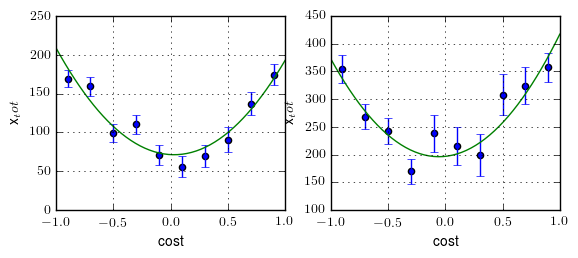

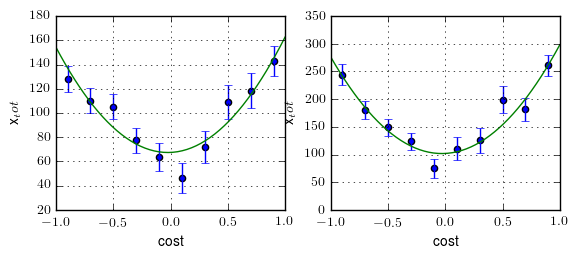

In [17]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(6.5,2.5))
leg_parms_e1f_1wq2bin = plots_1wq2bin(df_e1f, 1.81, 2.043, ax1)
leg_parms_e16_1wq2bin = plots_1wq2bin(df_e16, 1.81, 2.043, ax2)
ax1.set_xlim(-1,1)
ax2.set_xlim(-1,1)
for res in leg_parms_e1f_1wq2bin:
    print(res)
for res in leg_parms_e16_1wq2bin:
    print(res)


print('*********')

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(6.5,2.5))
leg_parms_e1f_1wq2bin = plots_1wq2bin(df_e1f, 1.81, 2.344, ax1)
leg_parms_e16_1wq2bin = plots_1wq2bin(df_e16, 1.81, 2.344, ax2)
ax1.set_xlim(-1,1)
ax2.set_xlim(-1,1)
for res in leg_parms_e1f_1wq2bin:
    print(res)
for res in leg_parms_e16_1wq2bin:
    print(res)

[ 47.49218949  45.11656518  30.49143219]
[ 2.9602505   5.42440223  6.1546809 ]
[ 71.4023337   44.053449    19.79803826]
[  5.77113747  10.52643765  11.48706003]
*********
[ 41.22189603  40.32475684  22.18523373]
[ 2.68918175  4.89385084  5.45324777]
[ 65.64804848  34.96026729  39.56376817]
[  4.75511039   8.99113805  10.01599177]


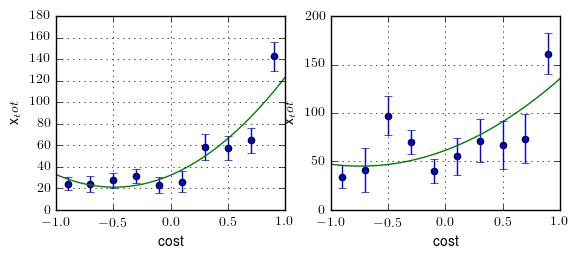

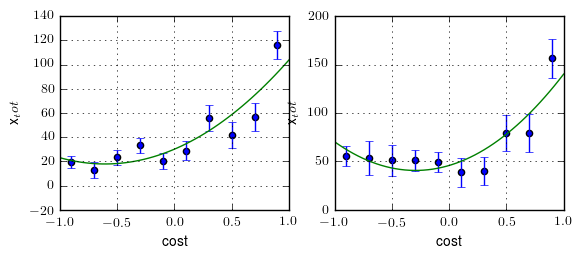

In [18]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(6.5,2.5))
leg_parms_e1f_1wq2bin = plots_1wq2bin(df_e1f, 2.05, 2.043, ax1, legR2)
leg_parms_e16_1wq2bin = plots_1wq2bin(df_e16, 2.05, 2.043, ax2, legR2)
ax1.set_xlim(-1,1)
ax2.set_xlim(-1,1)
for res in leg_parms_e1f_1wq2bin:
    print(res)
for res in leg_parms_e16_1wq2bin:
    print(res)


print('*********')

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(6.5,2.5))
leg_parms_e1f_1wq2bin = plots_1wq2bin(df_e1f, 2.05, 2.344, ax1, legR2)
leg_parms_e16_1wq2bin = plots_1wq2bin(df_e16, 2.05, 2.344, ax2, legR2)
ax1.set_xlim(-1,1)
ax2.set_xlim(-1,1)
for res in leg_parms_e1f_1wq2bin:
    print(res)
for res in leg_parms_e16_1wq2bin:
    print(res)

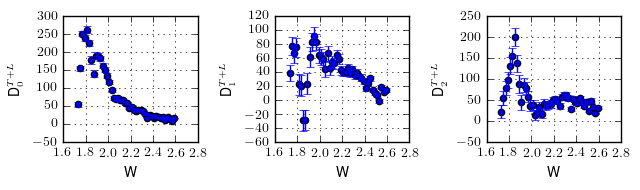

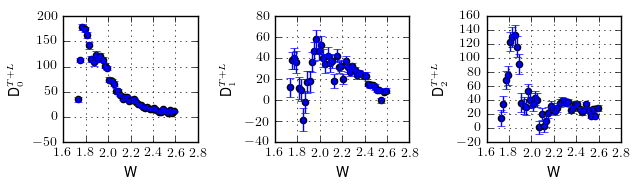

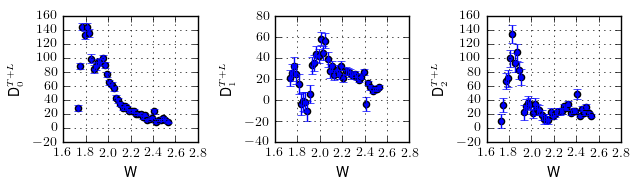

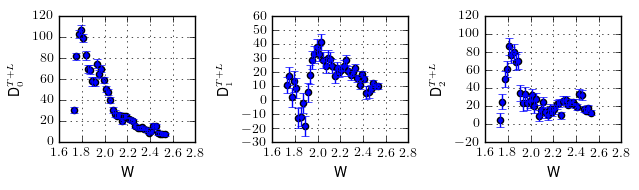

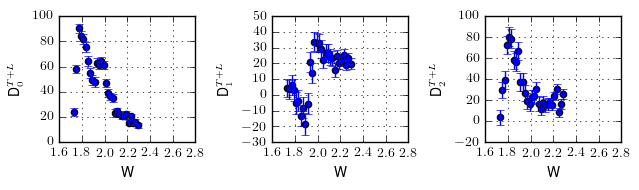

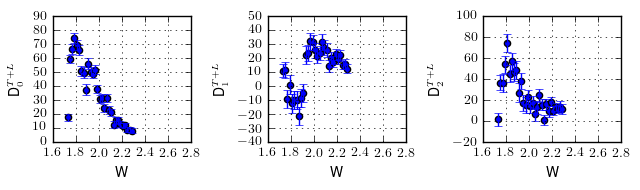

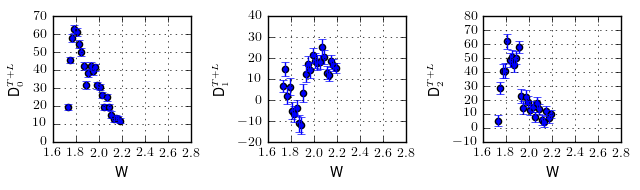

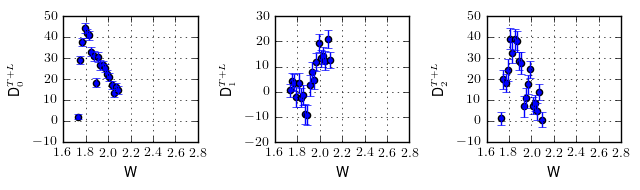

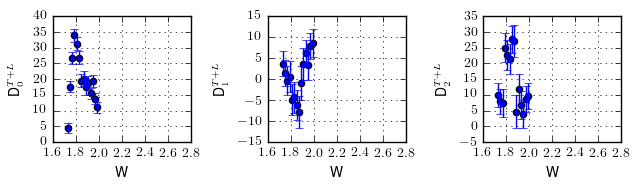

In [19]:
#%matplotlib inline
df = df_e16_legs.replace(np.inf, np.nan).dropna()
for Q2 in sorted(df.Q2.unique()):
    fig, axes = plt.subplots(1,3, figsize=(6.5,2))
    df_1q2 = df[df.Q2==Q2]
    for ax, leg_i, lbl in zip(axes, ['D0_tot', 'D1_tot', 'D2_tot'], [r'D^{T+L}_0', r'D^{T+L}_1', r'D^{T+L}_2']):
        df_1q2.plot('W', leg_i, yerr='%s_err'%leg_i, kind='scatter', ax=ax)
        ax.set_ylabel(lbl)
        ax.grid()
        ax.set_xlim(1.6,2.8)
#         ax.set_title(lbl)
    plt.tight_layout()

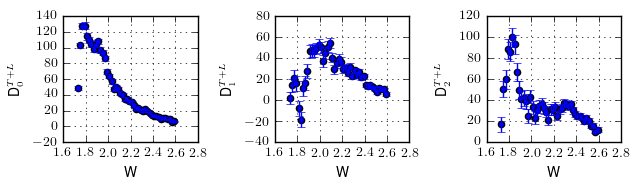

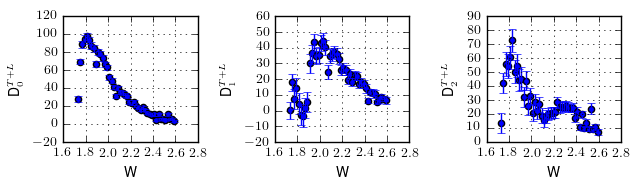

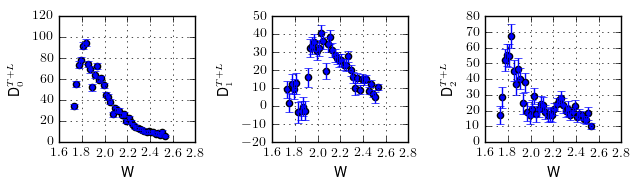

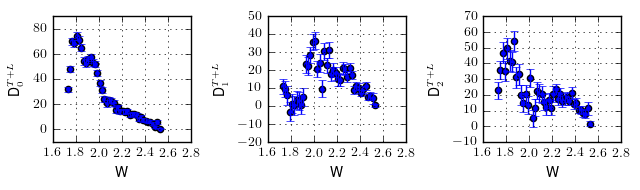

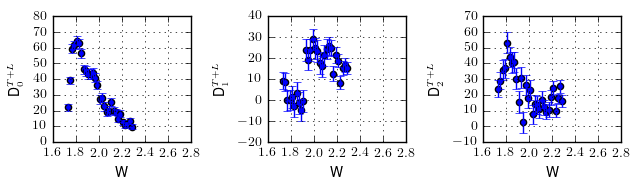

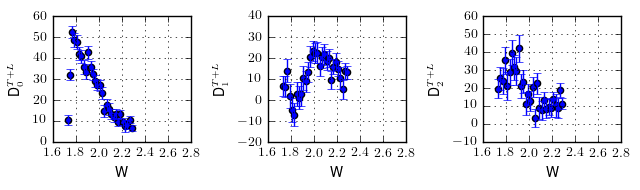

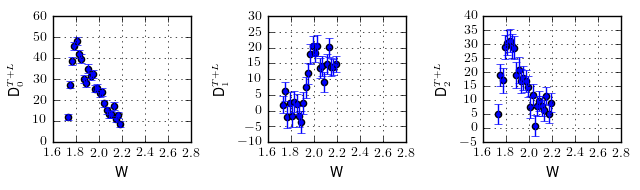

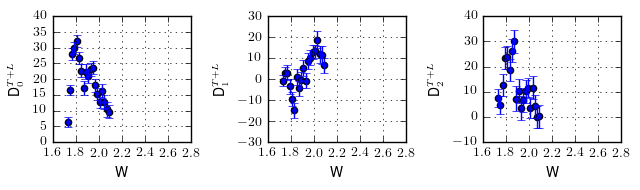

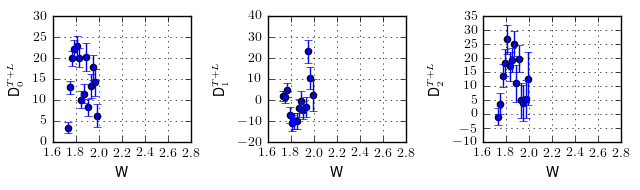

In [20]:
#%matplotlib inline
df = df_e1f_legs.replace(np.inf, np.nan).dropna()
for Q2 in sorted(df.Q2.unique()):
    fig, axes = plt.subplots(1,3, figsize=(6.5,2))
    df_1q2 = df[df.Q2==Q2]
    for ax, leg_i, lbl in zip(axes, ['D0_tot', 'D1_tot', 'D2_tot'], [r'D^{T+L}_0', r'D^{T+L}_1', r'D^{T+L}_2']):
        df_1q2.plot('W', leg_i, yerr='%s_err'%leg_i, kind='scatter', ax=ax)
        ax.set_ylabel(lbl)
        ax.grid()
        ax.set_xlim(1.6,2.8)
#         ax.set_title(lbl)
    plt.tight_layout()

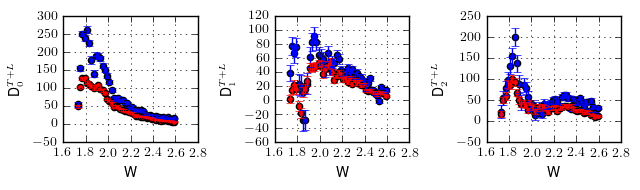

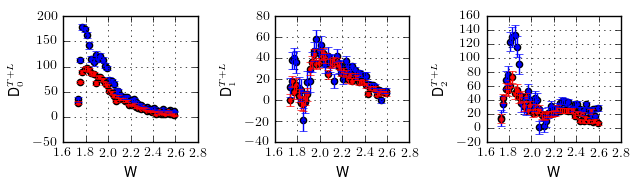

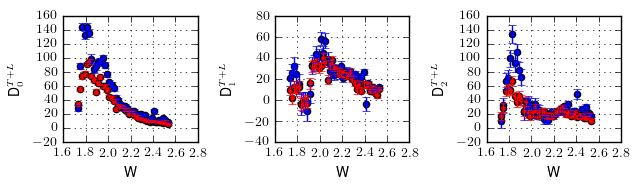

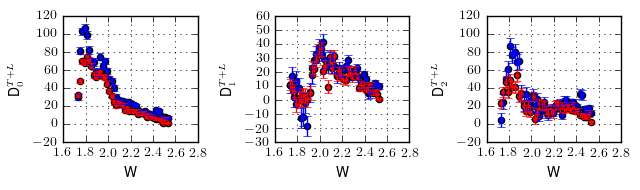

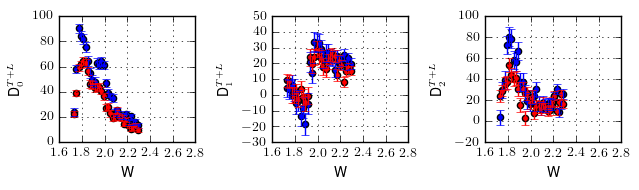

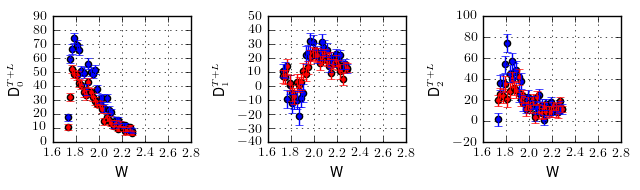

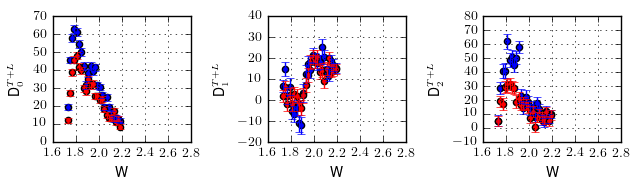

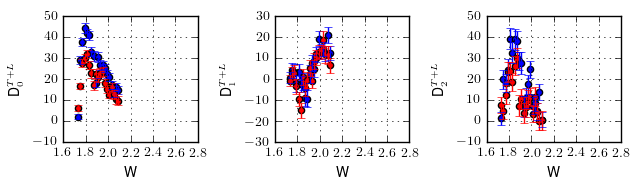

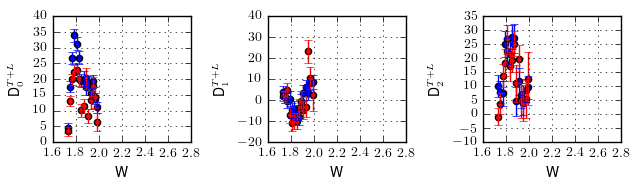

In [21]:
#%matplotlib inline
df_6 = df_e16_legs.replace(np.inf, np.nan).dropna()
df_f = df_e1f_legs.replace(np.inf, np.nan).dropna()

for Q2 in sorted(df_6.Q2.unique()):
    fig, axes = plt.subplots(1,3, figsize=(6.5,2))
    df_1q2 = df_6[df_6.Q2==Q2]
    df_1q2_f = df_f[df_f.Q2==Q2]
    for ax, leg_i, lbl in zip(axes, ['D0_tot', 'D1_tot', 'D2_tot'], [r'D^{T+L}_0', r'D^{T+L}_1', r'D^{T+L}_2']):
        df_1q2.plot('W', leg_i, yerr='%s_err'%leg_i, kind='scatter', ax=ax)
        df_1q2_f.plot('W', leg_i, yerr='%s_err'%leg_i, kind='scatter', color='r', ax=ax)
        ax.set_ylabel(lbl)
        ax.grid()
        ax.set_xlim(1.6,2.8)
#         ax.set_title(lbl)
    plt.tight_layout()

2.043
2.344
2.544
2.845
3.045
3.346
3.721
4.225
4.699


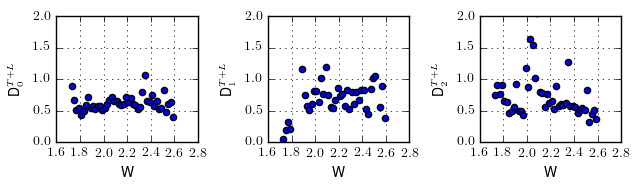

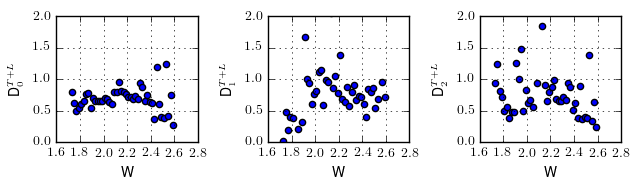

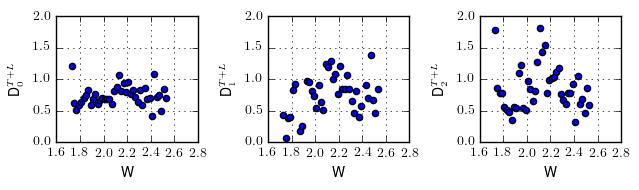

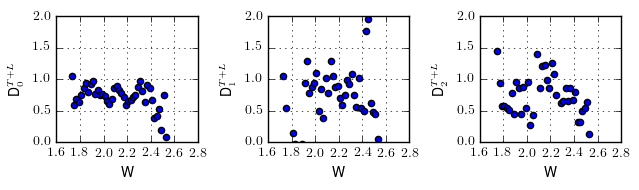

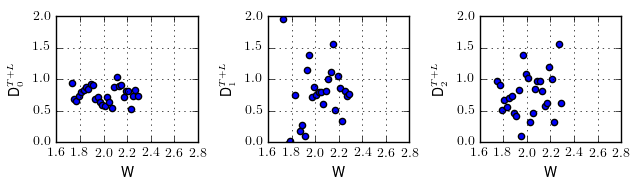

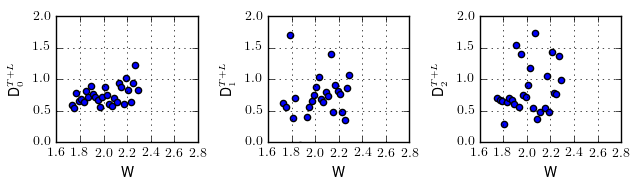

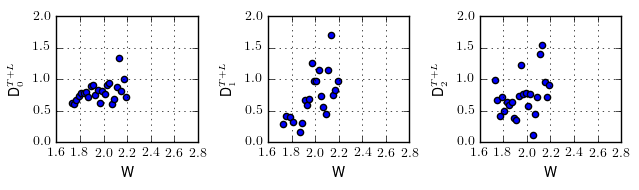

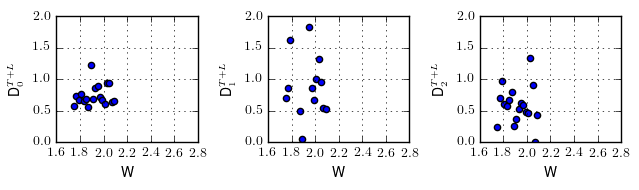

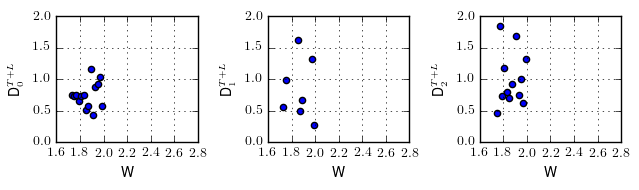

In [22]:
#%matplotlib inline
df_6 = df_e16_legs.replace(np.inf, np.nan).dropna()
df_f = df_e1f_legs.replace(np.inf, np.nan).dropna()

for Q2 in sorted(df_6.Q2.unique()):
    fig, axes = plt.subplots(1,3, figsize=(6.5,2))
    df_1q2 = df_6[df_6.Q2==Q2].set_index('W', drop=False)
    df_1q2_f = df_f[df_f.Q2==Q2].set_index('W', drop=False)
    for ax, leg_i, lbl in zip(axes, ['D0_tot', 'D1_tot', 'D2_tot'], [r'D^{T+L}_0', r'D^{T+L}_1', r'D^{T+L}_2']):
        df_1q2_f['rat'] = df_1q2_f[leg_i]/df_1q2[leg_i]
#         df_1q2_f['rat_err'] = df_1q2_f['%s_err'%leg_i]/df_1q2[leg_i]
#         df_1q2_f.plot('W', 'rat', yerr='%s_err'%leg_i, kind='scatter', ax=ax)
        df_1q2_f.plot('W', 'rat', kind='scatter', ax=ax)
        ax.set_ylabel(lbl)
        ax.grid()
        ax.set_xlim(1.6,2.8)
        ax.set_ylim(0,2)
#         ax.set_title(lbl)
    print(Q2)
    plt.tight_layout()

2.043
2.344
2.544
2.845
3.045
3.346
3.721
4.225
4.699


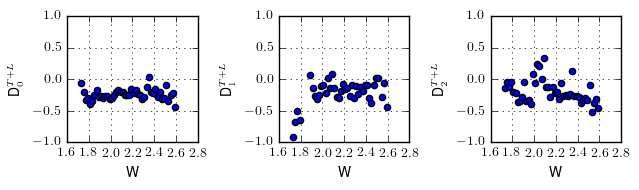

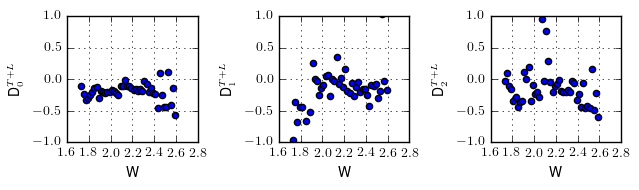

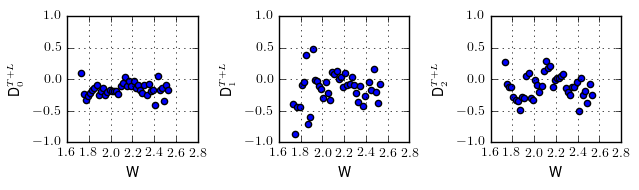

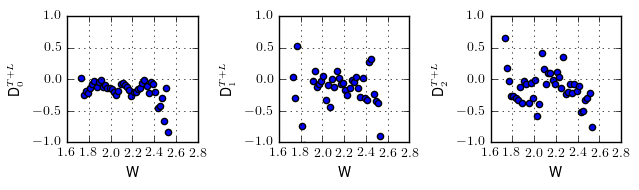

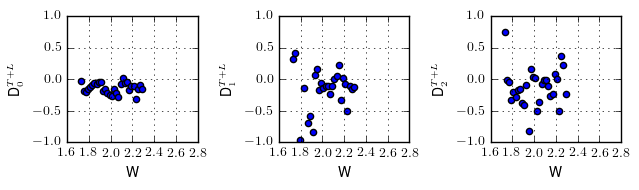

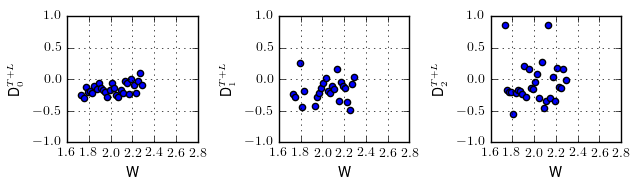

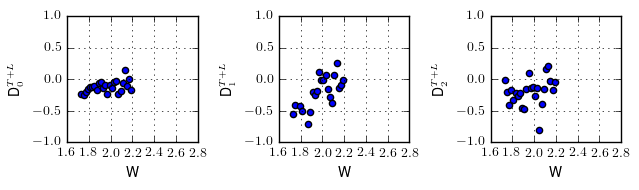

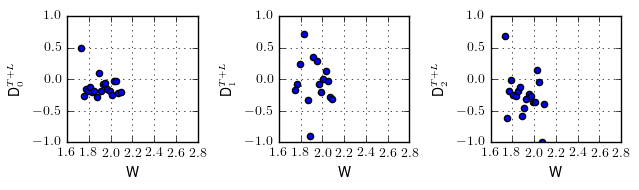

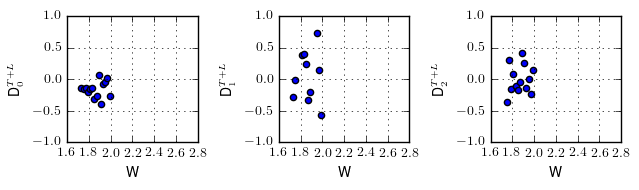

In [23]:
#%matplotlib inline
df_6 = df_e16_legs.replace(np.inf, np.nan).dropna()
df_f = df_e1f_legs.replace(np.inf, np.nan).dropna()

for Q2 in sorted(df_6.Q2.unique()):
    fig, axes = plt.subplots(1,3, figsize=(6.5,2))
    df_1q2 = df_6[df_6.Q2==Q2].set_index('W', drop=False)
    df_1q2_f = df_f[df_f.Q2==Q2].set_index('W', drop=False)
    for ax, leg_i, lbl in zip(axes, ['D0_tot', 'D1_tot', 'D2_tot'], [r'D^{T+L}_0', r'D^{T+L}_1', r'D^{T+L}_2']):
        df_1q2_f['rat'] = (df_1q2_f[leg_i]-df_1q2[leg_i])/(df_1q2_f[leg_i]+df_1q2[leg_i])
#         df_1q2_f['rat_err'] = df_1q2_f['%s_err'%leg_i]/df_1q2[leg_i]
#         df_1q2_f.plot('W', 'rat', yerr='%s_err'%leg_i, kind='scatter', ax=ax)
        df_1q2_f.plot('W', 'rat', kind='scatter', ax=ax)
        ax.set_ylabel(lbl)
        ax.grid()
        ax.set_xlim(1.6,2.8)
        ax.set_ylim(-1,1)
#         ax.set_title(lbl)
    print(Q2)
    plt.tight_layout()

In [24]:
# print(parms_exp_q2strs)
# df_e16.Q2.unique()
def wsum(s):
    return (s*0.2).sum()/2*4*math.pi
df_e16[(df_e16.W<1.9)&(df_e16.W>1.8)&(df_e16.Q2==2.043)].groupby(['W','int_d', 'int_f'])['x_tot'].agg(['sum',wsum]).reset_index()
# df_e16

,W,int_d,int_f,sum,wsum
0,1.81,2967.512143,3366.650953,2679.095704,3366.650953
1,1.83,2379.465214,2996.074710,2384.200500,2996.074710
2,1.85,2061.603433,2157.958721,1717.248987,2157.958721
3,1.87,1608.866686,1684.195895,1340.240509,1684.195895
4,1.89,1860.825810,2289.082123,1821.593675,2289.082123


/home/ephelps/projects/anaconda2/envs/root6_py3/lib/python3.4/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ephelps/projects/anaconda2/envs/root6_py3/lib/python3.4/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


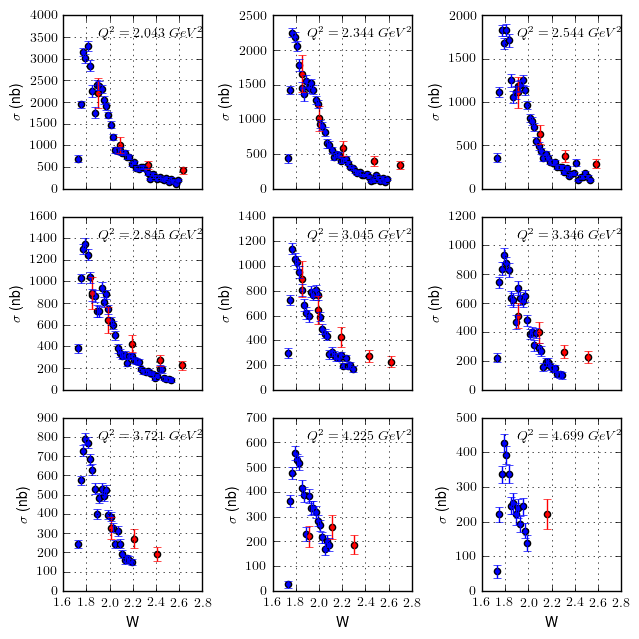

In [25]:
#%matplotlib inline
df_m = pd.read_table('/home/ephelps/dropbox/Notebooks/omega/Projects/Omega/Cross-sections/Morand/xsect_integrated_morand.txt')
df_6 = df_e16_legs.replace(np.inf, np.nan).dropna()
# df_f = df_e1f_legs.replace(np.inf, np.nan).dropna()

fig, axes = plt.subplots(3,3, figsize=(6.5,6.5), sharex=True)
for ax,Q2 in zip(fig.get_axes(), sorted(df_6.Q2.unique())):
    leg_i = 'D0_tot'
    lbl = r'$\sigma$ (nb)'
    df_1q2 = df_6[df_6.Q2==Q2]
    df_1q2[leg_i] = df_1q2[leg_i]*4*math.pi
    df_1q2['%s_err'%leg_i] = df_1q2['%s_err'%leg_i]*4*math.pi
    df_1q2_m = df_m[(df_m.Q2>(Q2-0.15))&(df_m.Q2<(Q2+0.15))]
    df_1q2.plot('W', leg_i, yerr='%s_err'%leg_i, kind='scatter', ax=ax)
    df_1q2_m.plot('W', 'xsect', yerr='error', kind='scatter', color='r', ax=ax)
    ax.set_ylabel(lbl)
    ax.grid()
    ax.set_xlim(1.6,2.8)
    ax.set_ylim(0)
    ax.text(0.25, 0.9, r'$Q^2 = %.3f\ GeV^2$'%Q2,
            fontsize=10,
            horizontalalignment='left',
            verticalalignment='center',
            transform=ax.transAxes)
    plt.tight_layout()

/home/ephelps/projects/anaconda2/envs/root6_py3/lib/python3.4/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ephelps/projects/anaconda2/envs/root6_py3/lib/python3.4/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


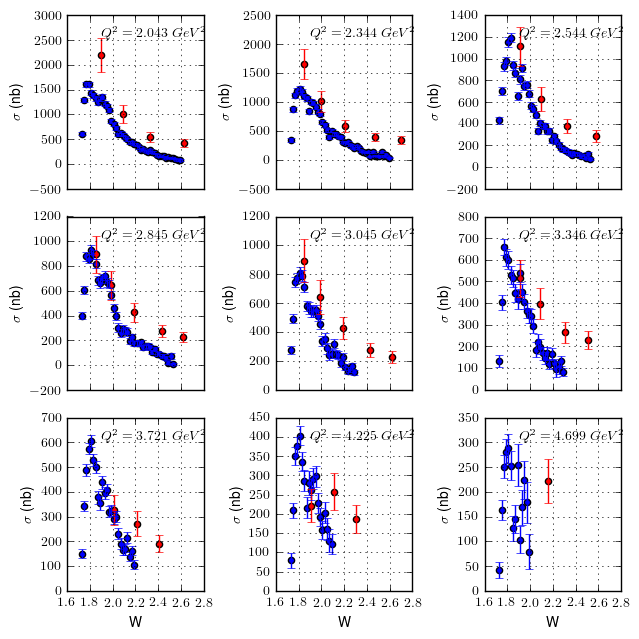

In [26]:
#%matplotlib inline
df_m = pd.read_table('/home/ephelps/dropbox/Notebooks/omega/Projects/Omega/Cross-sections/Morand/xsect_integrated_morand.txt')
df_6 = df_e1f_legs.replace(np.inf, np.nan).dropna()
# df_f = df_e1f_legs.replace(np.inf, np.nan).dropna()

fig, axes = plt.subplots(3,3, figsize=(6.5,6.5), sharex=True)
for ax,Q2 in zip(fig.get_axes(), sorted(df_6.Q2.unique())):
    leg_i = 'D0_tot'
    lbl = r'$\sigma$ (nb)'
    df_1q2 = df_6[df_6.Q2==Q2]
    df_1q2[leg_i] = df_1q2[leg_i]*4*math.pi
    df_1q2['%s_err'%leg_i] = df_1q2['%s_err'%leg_i]*4*math.pi
    df_1q2_m = df_m[(df_m.Q2>(Q2-0.15))&(df_m.Q2<(Q2+0.15))]
    df_1q2.plot('W', leg_i, yerr='%s_err'%leg_i, kind='scatter', ax=ax)
    df_1q2_m.plot('W', 'xsect', yerr='error', kind='scatter', color='r', ax=ax)
    ax.set_ylabel(lbl)
    ax.grid()
    ax.set_xlim(1.6,2.8)
    ax.text(0.25, 0.9, r'$Q^2 = %.3f\ GeV^2$'%Q2,
            fontsize=10,
            horizontalalignment='left',
            verticalalignment='center',
            transform=ax.transAxes)
    plt.tight_layout()

/home/ephelps/projects/anaconda2/envs/root6_py3/lib/python3.4/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ephelps/projects/anaconda2/envs/root6_py3/lib/python3.4/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ephelps/projects/anaconda2/envs/root6_py3/lib/python3.4/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

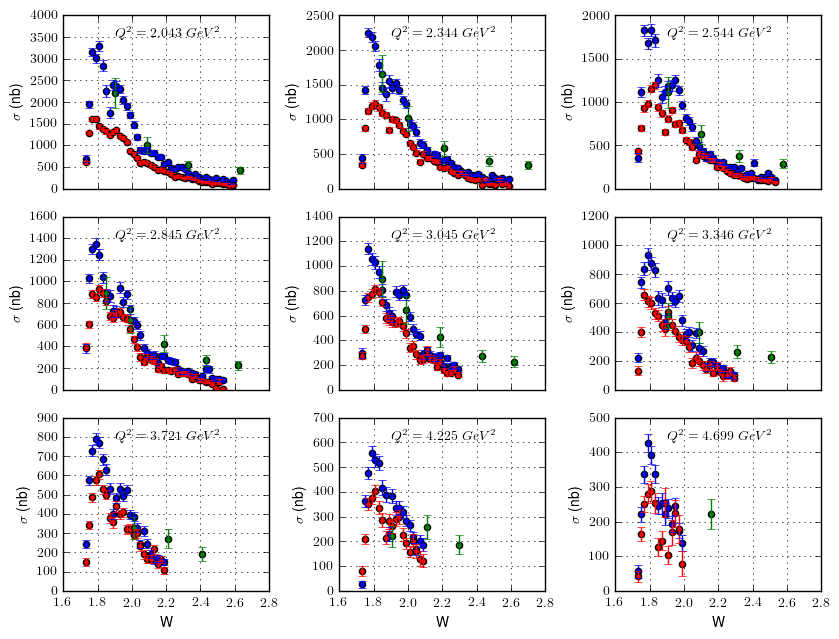

In [27]:
#%matplotlib inline
df_m = pd.read_table('/home/ephelps/dropbox/Notebooks/omega/Projects/Omega/Cross-sections/Morand/xsect_integrated_morand.txt')
df_6 = df_e16_legs.replace(np.inf, np.nan).dropna()
df_f = df_e1f_legs.replace(np.inf, np.nan).dropna()

fig, axes = plt.subplots(3,3, figsize=(8.5,6.5), sharex=True)
for ax,Q2 in zip(fig.get_axes(), sorted(df_6.Q2.unique())):
    leg_i = 'D0_tot'
    lbl = r'$\sigma$ (nb)'
    df_1q2 = df_6[df_6.Q2==Q2]
    df_1q2_f = df_f[df_f.Q2==Q2]
    df_1q2[leg_i] = df_1q2[leg_i]*4*math.pi
    df_1q2['%s_err'%leg_i] = df_1q2['%s_err'%leg_i]*4*math.pi
    df_1q2_f[leg_i] = df_1q2_f[leg_i]*4*math.pi
    df_1q2_f['%s_err'%leg_i] = df_1q2_f['%s_err'%leg_i]*4*math.pi
    df_1q2_m = df_m[(df_m.Q2>(Q2-0.15))&(df_m.Q2<(Q2+0.15))]
    df_1q2.plot('W', leg_i, yerr='%s_err'%leg_i, kind='scatter', color='b', ax=ax)
    df_1q2_f.plot('W', leg_i, yerr='%s_err'%leg_i, kind='scatter', color='r', ax=ax)
    df_1q2_m.plot('W', 'xsect', yerr='error', kind='scatter', color='g', ax=ax)
    ax.set_ylabel(lbl)
    ax.grid()
    ax.set_ylim(0)
    ax.set_xlim(1.6,2.8)
    ax.text(0.25, 0.9, r'$Q^2 = %.3f\ GeV^2$'%Q2,
            fontsize=10,
            horizontalalignment='left',
            verticalalignment='center',
            transform=ax.transAxes)
    plt.tight_layout()

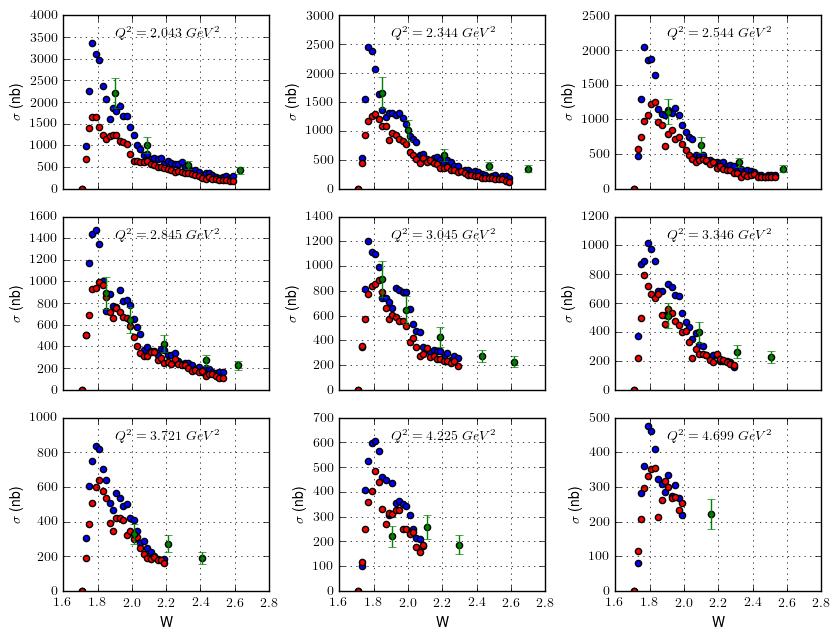

In [28]:
#%matplotlib inline
df_m = pd.read_table('/home/ephelps/dropbox/Notebooks/omega/Projects/Omega/Cross-sections/Morand/xsect_integrated_morand.txt')
# df_6 = df_e16_legs.replace(np.inf, np.nan).dropna()
# df_f = df_e1f_legs.replace(np.inf, np.nan).dropna()
df_6 = df_e16[['W','Q2','int_d']].drop_duplicates()
df_f = df_e1f[['W','Q2','int_d']].drop_duplicates()
fig, axes = plt.subplots(3,3, figsize=(8.5,6.5), sharex=True)
for ax,Q2 in zip(fig.get_axes(), sorted(df_6.Q2.unique())):
    leg_i = 'int_d'
    lbl = r'$\sigma$ (nb)'
    df_1q2 = df_6[df_6.Q2==Q2]
    df_1q2_f = df_f[df_f.Q2==Q2]
    df_1q2_m = df_m[(df_m.Q2>(Q2-0.15))&(df_m.Q2<(Q2+0.15))]
    df_1q2.plot('W', leg_i, kind='scatter', color='b', ax=ax)
    df_1q2_f.plot('W', leg_i, kind='scatter', color='r', ax=ax)
    df_1q2_m.plot('W', 'xsect', yerr='error', kind='scatter', color='g', ax=ax)
    ax.set_ylabel(lbl)
    ax.grid()
    ax.set_ylim(0)
    ax.set_xlim(1.6,2.8)
    ax.text(0.25, 0.9, r'$Q^2 = %.3f\ GeV^2$'%Q2,
            fontsize=10,
            horizontalalignment='left',
            verticalalignment='center',
            transform=ax.transAxes)
    plt.tight_layout()

Setting up binned data for /home/ephelps/projects/phys-ana-omega/e1f6/test/e1f_exp_h6_t1.root:h6_eid_efid_nphe_hfid_pcor_badsc_mmp
Setting up binned data for /home/ephelps/projects/phys-ana-omega/e1f6/test/e16_exp_h6_t1_nopcor.root:h6_eid_efid_nphe_hfid_pcor_badsc_mmp


/home/ephelps/projects/anaconda2/envs/root6_py3/lib/python3.4/site-packages/numpy/ma/extras.py:588: RuntimeWarning: invalid value encountered in double_scalars
  result = n / d


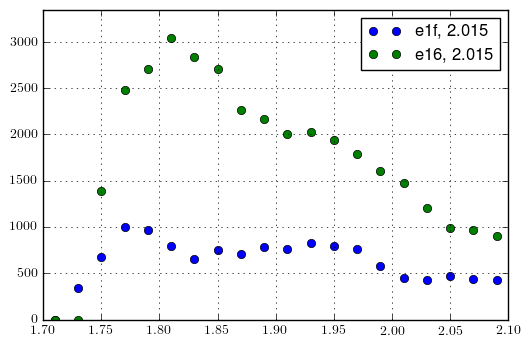

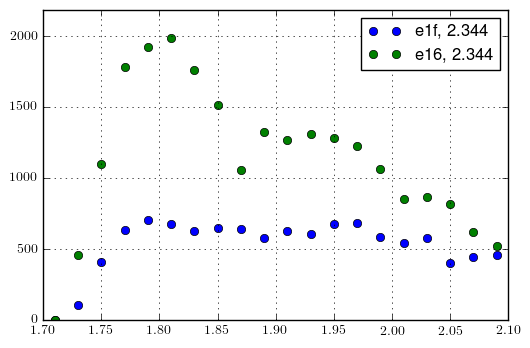

**************
Cleaning up...
--------------
simulated data files:
	/home/ephelps/projects/phys-ana-omega/e1f6/test/e16_sim_skim_top1_175_275_t03.root
**************
**************
Cleaning up...
--------------
data file:	/home/ephelps/projects/phys-ana-omega/e1f6/test/e16_exp_h6_t1_nopcor.root
directory:	h6_eid_efid_nphe_hfid_pcor_badsc_mmph6 yields:	hbd_yield
h6 weights:	hbd_nphe_eff
**************
**************
Cleaning up...
--------------
simulated data files:
	/home/ephelps/projects/phys-ana-omega/e1f6/test/e1f_sim_skim_top1_175_275_t03.root
**************
**************
Cleaning up...
--------------
data file:	/home/ephelps/projects/phys-ana-omega/e1f6/test/e1f_exp_h6_t1.root
directory:	h6_eid_efid_nphe_hfid_pcor_badsc_mmph6 yields:	hbd_yield
h6 weights:	hbd_nphe_eff
**************


In [6]:
(e16_xsects_t1, e1f_xsects_t1) = xsects(1.71, 2.1, [[1.9, 2.2], [2.2, 2.5]], parms_t1)

Setting up binned data for /home/ephelps/projects/phys-ana-omega/e1f6/test/e1f_exp_h6_t2.root:h6_eid_efid_nphe_hfid_pcor_badsc_mmp
Setting up binned data for /home/ephelps/projects/phys-ana-omega/e1f6/test/e16_exp_h6_t2_nopcor.root:h6_eid_efid_nphe_hfid_pcor_badsc_mmp


/home/ephelps/projects/anaconda2/envs/root6_py3/lib/python3.4/site-packages/numpy/ma/extras.py:588: RuntimeWarning: invalid value encountered in double_scalars
  result = n / d


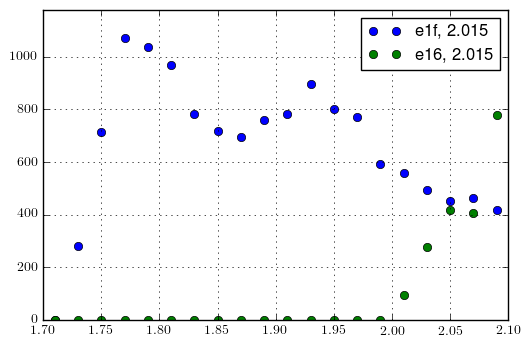

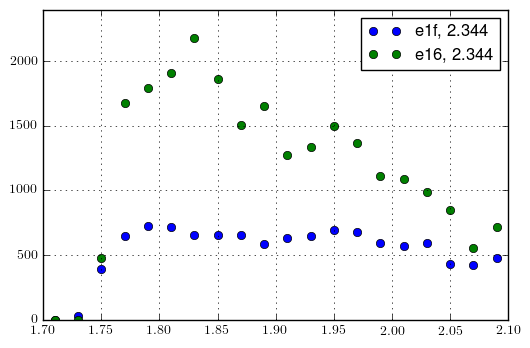

**************
Cleaning up...
--------------
simulated data files:
	/home/ephelps/projects/phys-ana-omega/e1f6/test/e16_sim_skim_top1_175_275_t03.root
**************
**************
Cleaning up...
--------------
data file:	/home/ephelps/projects/phys-ana-omega/e1f6/test/e16_exp_h6_t2_nopcor.root
directory:	h6_eid_efid_nphe_hfid_pcor_badsc_mmph6 yields:	hbd_yield
h6 weights:	hbd_nphe_eff
**************
**************
Cleaning up...
--------------
simulated data files:
	/home/ephelps/projects/phys-ana-omega/e1f6/test/e1f_sim_skim_top1_175_275_t03.root
**************
**************
Cleaning up...
--------------
data file:	/home/ephelps/projects/phys-ana-omega/e1f6/test/e1f_exp_h6_t2.root
directory:	h6_eid_efid_nphe_hfid_pcor_badsc_mmph6 yields:	hbd_yield
h6 weights:	hbd_nphe_eff
**************


In [7]:
(e16_xsects_t2, e1f_xsects_t2) = xsects(1.71, 2.1, [[1.9, 2.2], [2.2, 2.5]], parms_t2)

Setting up binned data for /home/ephelps/projects/phys-ana-omega/e1f6/test/e1f_exp_h6_t3.root:h6_eid_efid_nphe_hfid_pcor_badsc_mmp
Setting up binned data for /home/ephelps/projects/phys-ana-omega/e1f6/test/e1f_exp_h6_t3.root:h6_eid_efid_nphe_hfid_pcor_badsc_mmp


/home/ephelps/projects/anaconda2/envs/root6_py3/lib/python3.4/site-packages/numpy/ma/extras.py:588: RuntimeWarning: invalid value encountered in double_scalars
  result = n / d


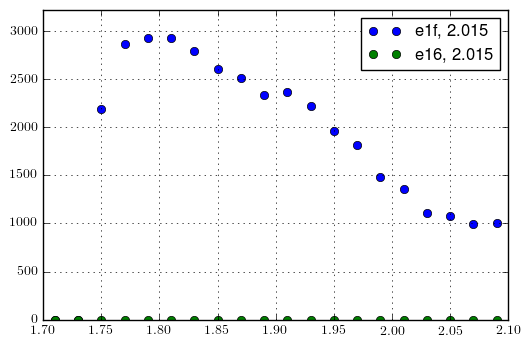

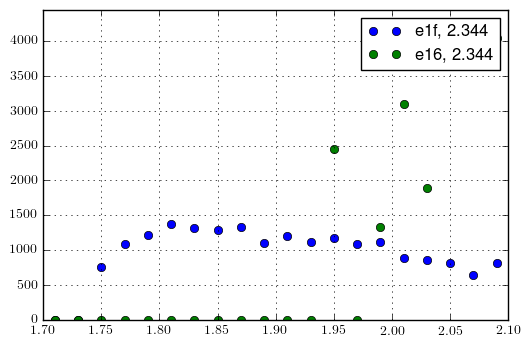

**************
Cleaning up...
--------------
simulated data files:
	/home/ephelps/projects/phys-ana-omega/e1f6/test/e16_sim_skim_top1_175_275_t03.root
**************
**************
Cleaning up...
--------------
data file:	/home/ephelps/projects/phys-ana-omega/e1f6/test/e1f_exp_h6_t3.root
directory:	h6_eid_efid_nphe_hfid_pcor_badsc_mmph6 yields:	hbd_yield
h6 weights:	hbd_nphe_eff
**************
**************
Cleaning up...
--------------
simulated data files:
	/home/ephelps/projects/phys-ana-omega/e1f6/test/e1f_sim_skim_top1_175_275_t03.root
**************
**************
Cleaning up...
--------------
data file:	/home/ephelps/projects/phys-ana-omega/e1f6/test/e1f_exp_h6_t3.root
directory:	h6_eid_efid_nphe_hfid_pcor_badsc_mmph6 yields:	hbd_yield
h6 weights:	hbd_nphe_eff
**************


In [8]:
(e16_xsects_t3, e1f_xsects_t3) = xsects(1.71, 2.1, [[1.9, 2.2], [2.2, 2.5]], parms_t3)

# individual

In [5]:
e1f_binned = ExpData('%s/%s'%(parms_t0.dirin, parms_t0.e1f_exp_fn))
e16_binned = ExpData('%s/%s'%(parms_t0.dirin, parms_t0.e16_exp_fn))

Setting up binned data for /home/ephelps/projects/phys-ana-omega/e1f6/test/e16_exp_h6_top1.root:h6_eid_efid_nphe_hfid_pcor_badsc_mmp
Setting up binned data for /home/ephelps/projects/phys-ana-omega/e1f6/test/e16_exp_h6_top1.root:h6_eid_efid_nphe_hfid_pcor_badsc_mmp


In [6]:
e16_sim = SimData()
# fns = ['e16_sim_skim_top1_lt320_ho.root', 'e16_sim_skim_top1_321_ho.root', 'e16_sim_skim_top1_326_ho.root']
fns = [parms_t0.e16_sim_fn]
for fn in fns:
        e16_sim.add_sim('%s/%s'%(parms_t0.dirin,parms_t0.e16_sim_fn),
                        h6rdir=parms_t0.e16_h6r_dir,
                        h6rfn='%s/%s'%(parms_t0.dirin,parms_t0.e16_h6r_fn))

e1f_sim = SimData()
# fns = ['e1f_sim_skim_top1_ho.root', 'e1f_sim_skim_top1_321_ho.root', 'e1f_sim_skim_top1_326_ho.root']
fns = [parms_t0.e1f_sim_fn]
for fn in fns:
        e1f_sim.add_sim('%s/%s'%(parms_t0.dirin,parms_t0.e1f_sim_fn),
                        h6rdir=parms_t0.e1f_h6r_dir,
                        h6rfn='%s/%s'%(parms_t0.dirin,parms_t0.e1f_h6r_fn))

In [13]:
# import imp
# imp.reload(ed)

<module 'ExpData' from '/home/ephelps/projects/phys-ana-omega/worksheets/ExpData.py'>

In [6]:
e1f_exparms = (e1f_binned, e1f_sim, E1F_E0, E1F_LUM, 0.15, 0.015)
e16_exparms = (e16_binned, e16_sim, E16_E0, E16_LUM, 0.25, 0.015)

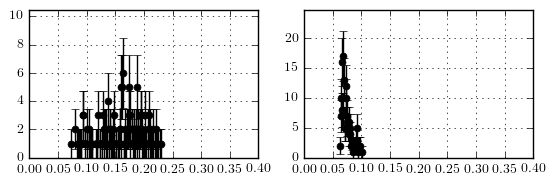

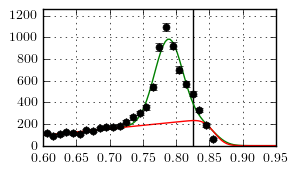

(52.886534863513326, 4.23584257419918)
(-7.38030276044439, 6.133916434456099)
(4.398225815393487, 5.997001642774614)
-
(52.59931964887993, 4.725105595108204)
(-7.52251957407283, 6.931163100577371)
(18.117690520812854, 6.549014039787005)
-
(47.57418863145042, 4.359272223276751)
(8.422474672150516, 5.805243460506286)
(-5.51502894260232, 5.946286303537432)
-
(44.23354526785523, 4.319490741413244)
(-13.376131635935193, 6.316026567412933)
(10.740361836094635, 5.912368387012927)
-
(42.8033778754975, 4.678473524373526)
(4.774021235723094, 6.637585600493794)
(-0.24879372143827214, 6.454235354102865)
-
(42.695536914472385, 4.726531347359746)
(16.259695665509117, 6.405534100238855)
(1.4999034489531913, 6.423939570464491)
-
(49.45749995853768, 5.180458143431731)
(12.523871425308494, 7.350299498872812)
(17.081045876751222, 7.4625620327045326)
-
(70.33364731337477, 5.914913142305703)
(25.32318566779053, 8.081983192473928)
(11.396217843367307, 8.341121800271898)
-
(86.03907270068598, 5.7567110109903

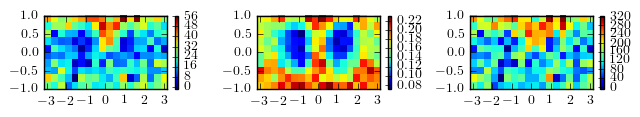

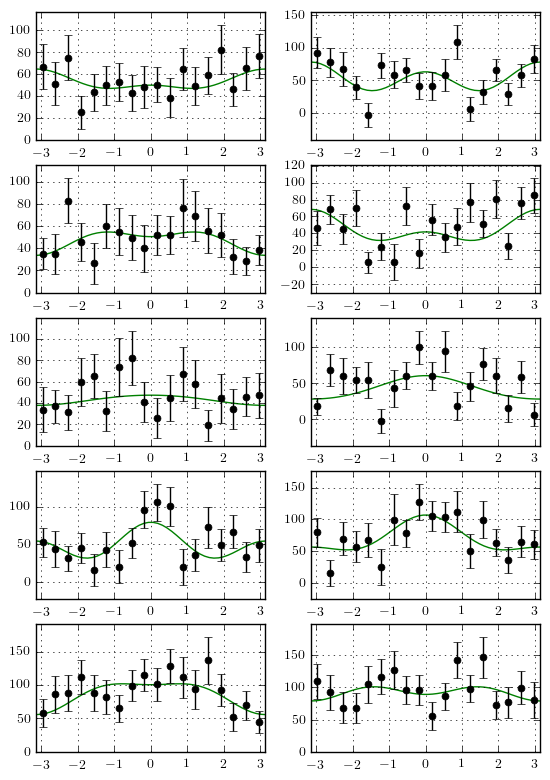

bjorken=0.464
Q2=2.015
W=1.790
epsilon=0.822
xsect_f=730.1 (alt: 730.1)
xsect_d=774.4


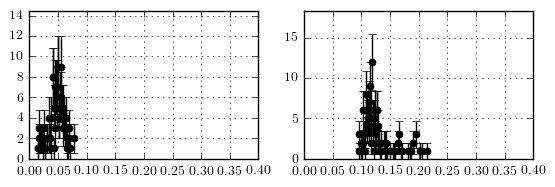

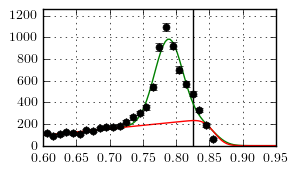

(158.77242764453254, 13.373834170783796)
(-38.8946513524578, 19.694888545398435)
(16.306762180336897, 18.154689350628)
-
(142.44381331577787, 13.78477881821249)
(-51.20352302660187, 20.06008200892601)
(45.86255925847849, 18.488452773258405)
-
(128.67428751087093, 12.090760438298139)
(0.22145843168541302, 16.004879047137802)
(-16.435511231494253, 17.08248978829948)
-
(110.29923067185386, 11.362412347625726)
(-45.21299237447945, 16.524779715097345)
(25.193250698194404, 15.474764340750802)
-
(107.25324223163007, 12.1528924127513)
(3.9027464052251815, 17.11871713023844)
(-6.353002444707343, 17.085514877018046)
-
(122.72624077811352, 13.872188219647951)
(50.40475822118272, 16.05598979387981)
(-19.115557128522063, 17.931823567885928)
-
(131.76564702478277, 14.156021227675549)
(45.05454501502781, 18.49569291973987)
(23.65440178429663, 18.927344338594512)
-
(172.81656511596879, 15.646120155482095)
(64.28810503017586, 20.50340067875839)
(7.809225606921037, 22.23609280922526)
-
(214.180979455424

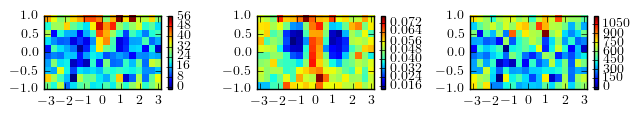

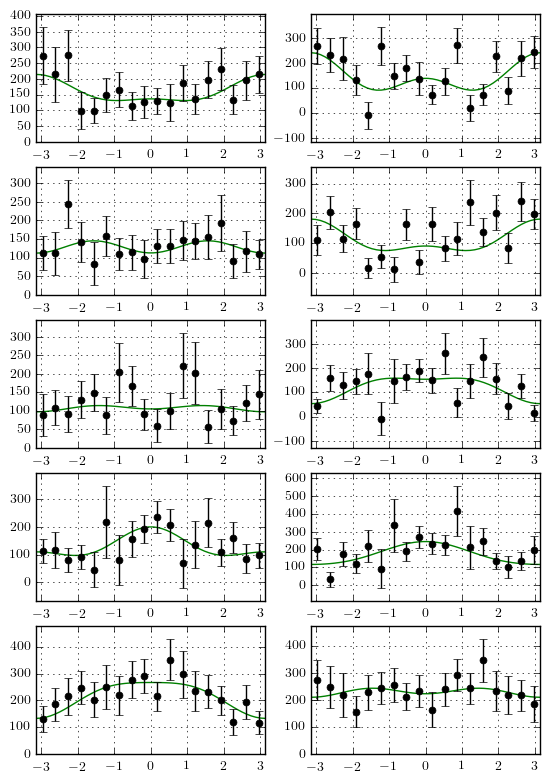

bjorken=0.464
Q2=2.015
W=1.790
epsilon=0.840
xsect_f=1908.3 (alt: 1908.3)
xsect_d=2049.4


In [13]:
W = 1.8
# Q2 = [2.0, 2.5]
Q2 = [1.9,2.2]
e1f_exparms = (e1f_binned, e1f_sim, E1F_E0, E1F_LUM, 0.15, 0.015)
e16_exparms = (e16_binned, e16_sim, E16_E0, E16_LUM, 0.25, 0.015)
e1f_18 = calc_diff_xsects(W, Q2, e1f_exparms, False)
e16_18 = calc_diff_xsects(W, Q2, e16_exparms, False)

In [7]:
W_0, W_1, = 1.73, 2.21
Ws = np.arange(W_0, W_1, 0.04)
# Q2 = [2.2, 2.5]
# Ws = [2, 2.21, 2.47]
Q2 = [2.2, 2.5]
# Q2 = [2.75, 3.25]
e1f_xsects_Q2_2p2_2p5 = [calc_diff_xsects(w, Q2, True, e1f_exparms) for w in Ws]
e16_xsects_Q2_2p2_2p5 = [calc_diff_xsects(w, Q2, True, e16_exparms) for w in Ws]

INFO:ROOT.TCanvas.MakeDefCanvas]  created default TCanvas with name c1


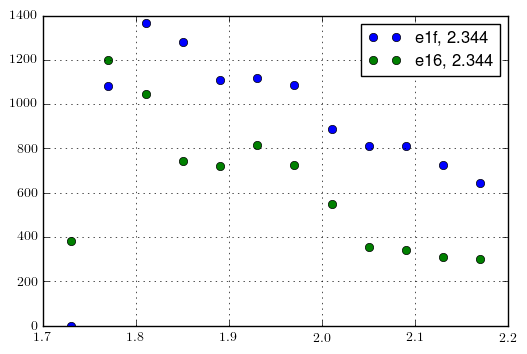

In [8]:
avgQ2 = e1f_xsects_Q2_2p2_2p5[0][1]
XY = [(xsect[2], xsect[5]) for xsect in e1f_xsects_Q2_2p2_2p5]
X,Y = zip(*XY)
plt.plot(X, Y, 'o', label='e1f, %.3f'%avgQ2)
XY = [(xsect[2], xsect[4]) for xsect in e16_xsects_Q2_2p2_2p5]
X,Y = zip(*XY)
plt.plot(X, Y, 'o', label='e16, %.3f'%avgQ2)
# XY = [(xsect[2], xsect[4]) for xsect in e1f_xsects_Q2_2p2_2p5]
# X,Y = zip(*XY)
# plt.plot(X, Y, 'o', label='ffit, %.3f'%avgQ2)
plt.legend()
plt.ylim(0)
plt.grid()
plt.show()

In [9]:
e1f_exparms = (e1f_binned, e1f_sim, E1F_E0, E1F_LUM, 0.15, 0.015)
e16_exparms = (e16_binned, e16_sim, E16_E0, E16_LUM, 0.25, 0.015)

W_0, W_1, = 1.73, 2.21
Ws = np.arange(W_0, W_1, 0.02)

Q2ranges = [
    [1.9,2.2], [2.2, 2.5],
#     [2.45, 2.75], [2.75, 3.1],
#     [3.1, 3.6], [3.6, 4.1],
]

# Q2 = [2.2, 2.5]
# Ws = [2, 2.21, 2.47]
e1f_xsects, e16_xsects = [], []
for Q2 in Q2ranges:
    e1f_xsects.append([calc_diff_xsects(w, Q2, True, e1f_exparms) for w in Ws])
    e16_xsects.append([calc_diff_xsects(w, Q2, True, e16_exparms) for w in Ws])

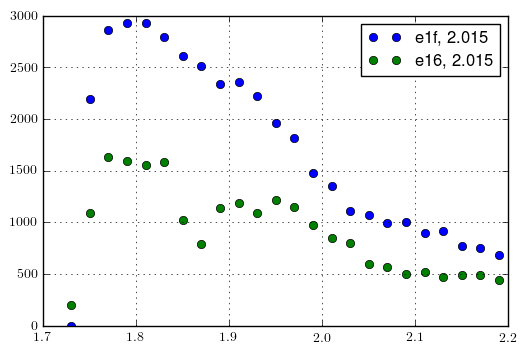

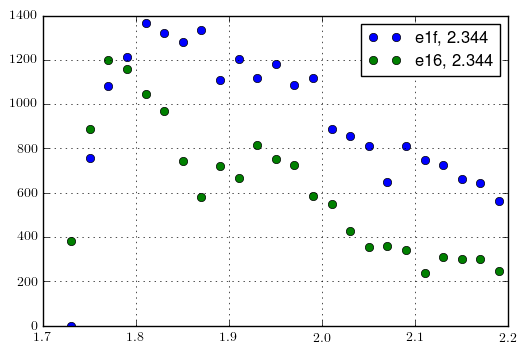

In [10]:
for e1f_xsect, e16_xsect in zip(e1f_xsects, e16_xsects):
    e1f_avgQ2 = e1f_xsect[0][1]
    e16_avgQ2 = e16_xsect[0][1]
    XY = [(xsect[2], xsect[5]) for xsect in e1f_xsect]
    X,Y = zip(*XY)
    plt.plot(X, Y, 'o', label='e1f, %.3f'%e1f_avgQ2)
    XY = [(xsect[2], xsect[4]) for xsect in e16_xsect]
    X,Y = zip(*XY)
    plt.plot(X, Y, 'o', label='e16, %.3f'%e16_avgQ2)
    # XY = [(xsect[2], xsect[4]) for xsect in e1f_xsects_Q2_2p2_2p5]
    # X,Y = zip(*XY)
    # plt.plot(X, Y, 'o', label='ffit, %.3f'%avgQ2)
    plt.legend()
    plt.ylim(0)
    plt.grid()
    plt.show()

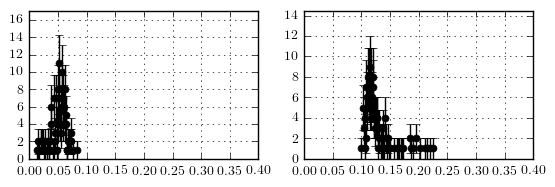

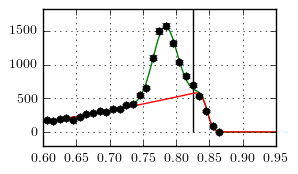

(297.17035111787027, 19.602541934630747)
(-52.55790017894107, 28.78239934126197)
(37.071539184606344, 28.0182237572863)
-
(255.54937296398555, 18.808778445271525)
(-67.30238246687532, 27.162572253687966)
(-12.64857377849493, 25.298611779109073)
-
(210.2935541179814, 17.24744068035355)
(-71.08320159682492, 25.790182344809512)
(55.850526622796224, 24.22478922349994)
-
(161.92006375929247, 17.402929448933534)
(35.29627527864996, 25.277501775640086)
(19.580811109992457, 25.37732921792372)
-
(132.2415209539612, 19.607734006119315)
(8.38157160968514, 28.07651664961653)
(54.4476467758862, 26.636341857811548)
-
(178.52995903526545, 21.130277752620113)
(128.06926741064527, 29.703677712824536)
(8.637137188234018, 30.133594244997543)
-
(175.24562107469185, 22.90190239272557)
(164.51547496753165, 30.871216609921056)
(45.08172281352221, 29.192878680587143)
-
(228.5539926362586, 22.177463738834785)
(109.55719613902166, 30.421227883248022)
(36.92112036945999, 30.076175204427027)
-
(262.153155257447, 

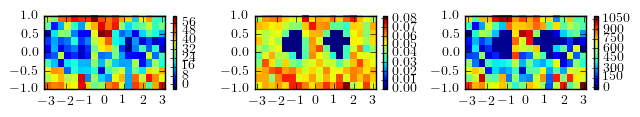

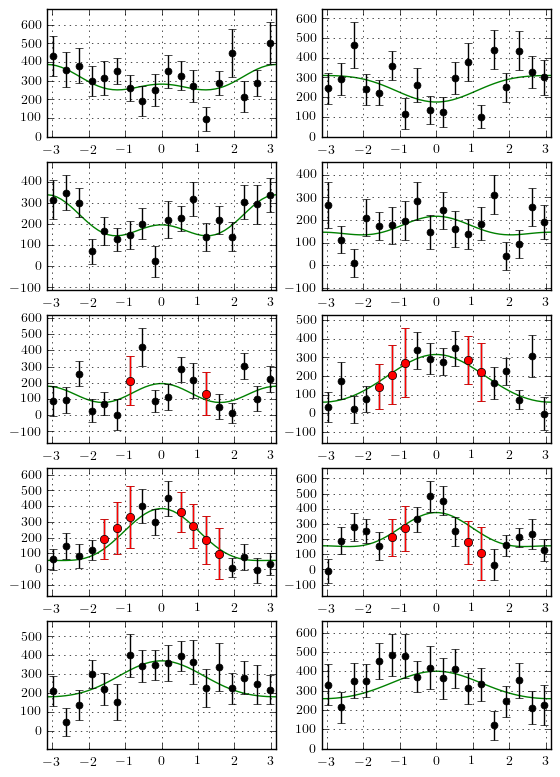

bjorken=0.464
Q2=2.015
W=1.790
epsilon=0.822
xsect_f=2794.8 (alt: 2794.8)
xsect_d=2931.2


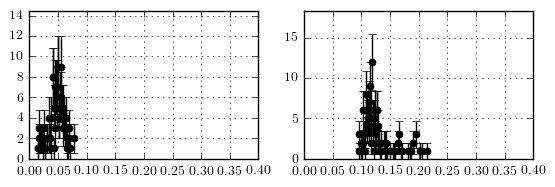

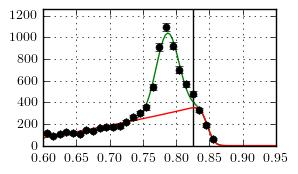

(129.92119220518174, 14.36551850595651)
(-39.74081022826562, 21.032920646488133)
(16.763879771387934, 19.493527560048292)
-
(110.86822733901971, 15.090284875718218)
(-51.48386038347369, 21.558242112113682)
(45.13967363330578, 20.50449341960667)
-
(104.16631385936931, 13.075186424356831)
(-0.4651610481292064, 17.37675372235734)
(-17.84557722396104, 18.50504225692536)
-
(95.24378884507378, 12.334827922810044)
(-49.60682469493216, 17.851770844625467)
(15.87386075308482, 16.82154570257876)
-
(87.05825129190355, 13.184457213286697)
(8.564241414483512, 18.70887987014973)
(-15.375153103373794, 18.52156077201793)
-
(106.08936748543667, 14.889628893083646)
(54.07296251732759, 17.228741762265244)
(-18.79565716925924, 19.277876442029704)
-
(108.87873710114481, 15.344993854674248)
(50.16320305587, 19.821826653481)
(22.09317476869265, 20.67865925052569)
-
(149.05503682953065, 16.570791375188552)
(73.35111637358676, 21.785872024912198)
(6.194860599295604, 23.688465303411782)
-
(189.78370602166214, 1

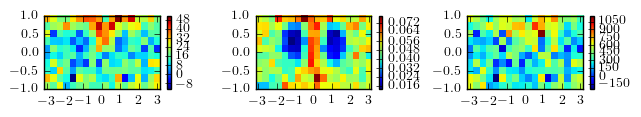

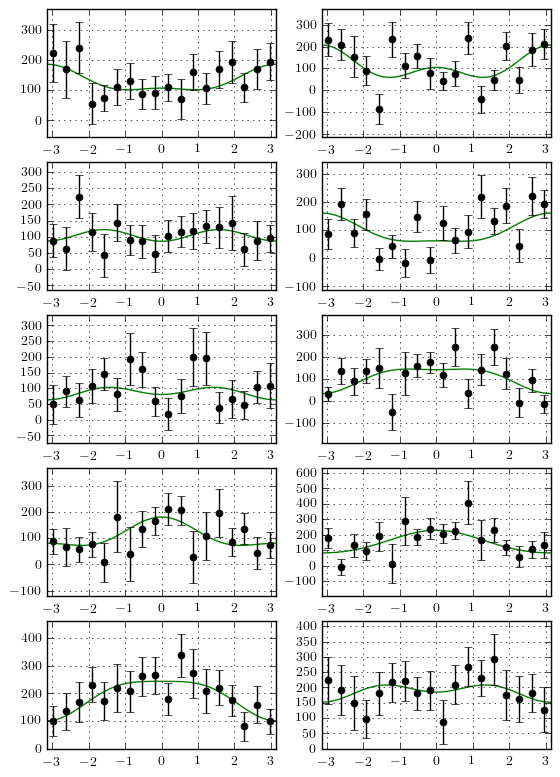

bjorken=0.464
Q2=2.015
W=1.790
epsilon=0.840
xsect_f=1594.1 (alt: 1594.1)
xsect_d=1674.0


In [22]:
e16_sim.h4s[0][1].Print()

In [25]:
w8d_Q2_mean(2.75, 3.25)

2.9860917633540978

In [3]:
e1f_sim = SimData()
dirin = '/home/ephelps/projects/phys-ana-omega/e1f6/test'
# fns = ['e1f_sim_skim_top1_ho.root', 'e1f_sim_skim_top1_321_ho.root', 'e1f_sim_skim_top1_326_ho.root']
fns = ['e1f_sim_skim_top1_175_275_t03.root']
for fn in fns:
        e1f_sim.add_sim('%s/%s'%(dirin,fn), h6tdir='h6thrown', h6rdir=e1f_h6r_dir)

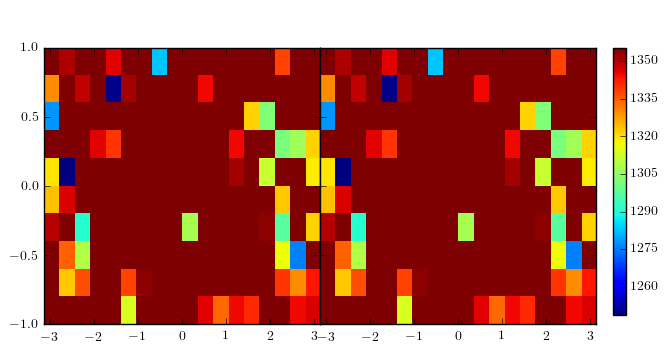

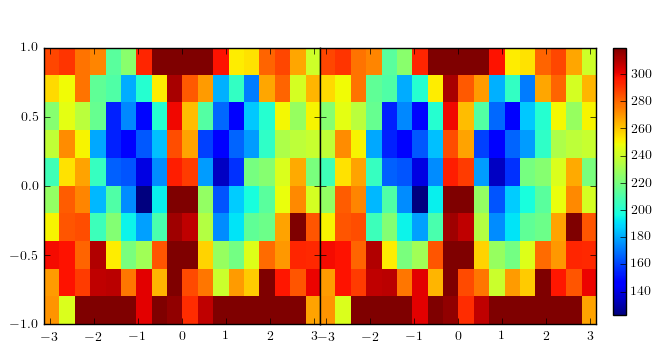

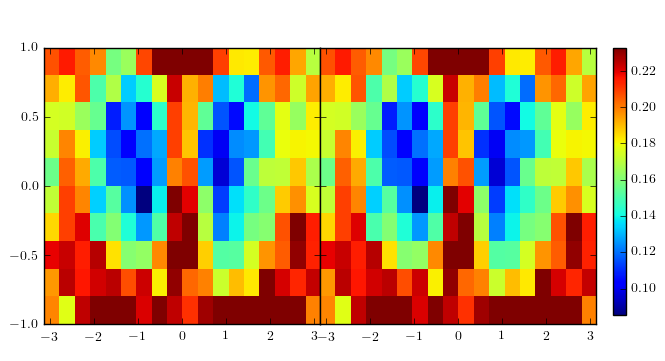

In [8]:
W, Q2 = 1.8, [2.0, 2.5]
e1f_accs = e1f_sim.get_acc2d(W, Q2, 0.15)

hts, hrs, has = [], [], []
for hss in e1f_accs:
    hts.append(hss[0])
    hrs.append(hss[1])
    has.append(hss[2])

for hss in [hts, hrs, has]:
    mdraw2d(hss, 1, 2, figsize=goldenaspect(6.5))